# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg
import glob

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [4]:
# Existing matplotlib version 3.9.2 so updating
#!pip install matplotlib==3.10.0

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [6]:
# Number of rows and columns
df.shape

(3041714, 19)

### rows 3041714 , columns 19

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [7]:
# File paths for all 12 months
import glob
file_paths = sorted(glob.glob("2023-*.parquet")) 
file_paths

['2023-1.parquet',
 '2023-10.parquet',
 '2023-11.parquet',
 '2023-12.parquet',
 '2023-2.parquet',
 '2023-3.parquet',
 '2023-4.parquet',
 '2023-5.parquet',
 '2023-6.parquet',
 '2023-7.parquet',
 '2023-8.parquet',
 '2023-9.parquet']

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [8]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

SyntaxError: invalid syntax (1362553251.py, line 42)

# taking files from local

In [11]:
#df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract date and hour
#df['date'] = df['tpep_pickup_datetime'].dt.date
#df['hour'] = df['tpep_pickup_datetime'].dt.hour

#df_grouped = df.groupby(['date', 'hour'])

In [12]:
#df_grouped.head()

In [13]:
# Function to sample data for each hour
def sample_data_from_Local (file_path, sample_fraction=0.05):
    df = pd.read_parquet(file_path)

    # Convert datetime column to datetime type
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    
    # Extract date and hour
    df['date'] = df['tpep_pickup_datetime'].dt.date
    df['hour'] = df['tpep_pickup_datetime'].dt.hour

    # Sampling process: 5% of trips per hour per day group record
    sampled_df = df.groupby(['date', 'hour']).apply(lambda x: x.sample(frac=sample_fraction, random_state=42)).reset_index(drop=True)

    return sampled_df

# File paths for all 12 months
file_paths = sorted(glob.glob("2023-*.parquet"))  

# Process all files
#sampled_data_list = [sample_data_from_Local(file) for file in file_paths]
# Process all files and print file names
sampled_data_list = []    # This list will hold the sample_df values for 12 months appended one after another with repetative header
for file in file_paths:
    print(f"Processing file: {file}")  # Print file name
    sampled_df = sample_data_from_Local(file)
    sampled_data_list.append(sampled_df)

# Combine all sampled data
final_sampled_df = pd.concat(sampled_data_list, ignore_index=True)

Processing file: 2023-1.parquet
Processing file: 2023-10.parquet
Processing file: 2023-11.parquet
Processing file: 2023-12.parquet
Processing file: 2023-2.parquet
Processing file: 2023-3.parquet
Processing file: 2023-4.parquet
Processing file: 2023-5.parquet
Processing file: 2023-6.parquet
Processing file: 2023-7.parquet
Processing file: 2023-8.parquet
Processing file: 2023-9.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [14]:
# Store the df in csv/parquet
# df.to_parquet('')

# Save the sampled dataset
final_sampled_df.to_parquet("sampled_data.parquet", index=False)

print("Sampling complete. Saved as sampled_data.parquet")

Sampling complete. Saved as sampled_data.parquet


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [3]:
# Load the new data file
df_s = pd.read_parquet("sampled_data.parquet")

In [4]:
#df.head()
df_s.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,N,141,140,1,...,0.5,2.00,0.0,1.0,13.50,2.5,0.00,2022-12-31,23,NaN
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN


In [5]:
# df.info()
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [6]:
df_s.shape

(1896400, 22)

In [7]:
df_s["payment_type"].value_counts()

payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [8]:
# Check missing/Nan values
df_s.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            64874
trip_distance                  0
RatecodeID                 64874
store_and_fwd_flag         64874
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       64874
airport_fee              1747917
date                           0
hour                           0
Airport_fee               213357
dtype: int64

In [9]:
# number of columns having missing values (Cross checking)
df_s.isnull().any().sum()

6

In [10]:
df_s["passenger_count"].unique()

array([ 1.,  2.,  3., nan,  4.,  6.,  5.,  0.,  8.,  7.,  9.])

In [11]:
df_s["passenger_count"].value_counts()

passenger_count
1.0    1377224
2.0     277298
3.0      69034
4.0      38537
0.0      29681
5.0      23871
6.0      15860
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

In [12]:
# Calculate percentage of missing values in passenger_count
missing_percentage_passenger_count = df_s['passenger_count'].isnull().sum() / len(df_s) * 100

# Print the result
print(f"Percentage of missing values in passenger_count: {missing_percentage_passenger_count:.2f}%")

Percentage of missing values in passenger_count: 3.42%


In [13]:
df_s["RatecodeID"].value_counts()

RatecodeID
1.0     1729259
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

In [14]:
# Calculate percentage of missing values in RatecodeID
missing_percentage_RatecodeID = df_s['RatecodeID'].isnull().sum() / len(df_s) * 100

# Print the result
print(f"Percentage of missing values in RatecodeID: {missing_percentage_RatecodeID:.2f}%")

Percentage of missing values in RatecodeID: 3.42%


In [15]:
df_s['airport_fee'].isnull().sum()

1747917

In [16]:
# Calculate percentage of missing values in passenger_count
missing_percentage_airport_fee = df_s['airport_fee'].isnull().sum() / len(df_s) * 100

missing_percentage_Airport_fee = df_s['Airport_fee'].isnull().sum() / len(df_s) * 100

# Print the result
print(f"Percentage of missing values in airport_fee: {missing_percentage_airport_fee:.2f}%")
print(f"Percentage of missing values in Airport_fee: {missing_percentage_Airport_fee:.2f}%")

Percentage of missing values in airport_fee: 92.17%
Percentage of missing values in Airport_fee: 11.25%


**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [17]:
# Fix the index and drop any columns that are not needed
# Reset index
df_s.reset_index(drop=True, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [18]:
# Combine the two airport fee columns

# Checking whether two coluns having same value or not
same_value_count = (df_s['airport_fee'] == df_s['Airport_fee']).sum()
print(f"Number of rows where values are the same: {same_value_count}")

count1 = df_s[df_s['Airport_fee'].isnull() & df_s['airport_fee'].notnull()].shape[0]
print(f"Rows where 'Airport_fee' is missing but 'airport_fee' has a value: {count1}")

count2 = df_s[df_s['airport_fee'].notnull() & df_s['Airport_fee'].notnull()].shape[0]
print(f"Rows where both 'airport_fee' and 'Airport_fee' have values: {count2}")

Number of rows where values are the same: 0
Rows where 'Airport_fee' is missing but 'airport_fee' has a value: 148483
Rows where both 'airport_fee' and 'Airport_fee' have values: 0


### so as there are 148483 rows where Airport_fee is missing but airport_fee has value, so we can combine

In [19]:
# filling the missing value from airport_fee
df_s['Airport_fee'].fillna(df_s['airport_fee'], inplace=True)

In [20]:
# Calculate percentage of missing values in passenger_count
missing_percentage_Airport_fee = df_s['Airport_fee'].isnull().sum() / len(df_s) * 100

# Print the result
print(f"Percentage of missing values in Airport_fee: {missing_percentage_Airport_fee:.2f}%")

Percentage of missing values in Airport_fee: 3.42%


### missing value reduced from 11.25% to 3.42%

In [21]:
# dropping column 'airport_fee'
df_s.drop(columns=['airport_fee'], inplace=True)

In [22]:
# Check missing/Nan values
df_s.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64874
trip_distance                0
RatecodeID               64874
store_and_fwd_flag       64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
date                         0
hour                         0
Airport_fee              64874
dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [23]:
df_s["payment_type"].value_counts()

payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64

In [24]:
### # check where values of fare amount are negative

In [25]:
# check where values of fare amount are negative

# Filter trips with negative monetary value columns
#negative_fare_df = df_s[(df_s['fare_amount'] < 0) | (df_s['tolls_amount'] < 0) | (df_s['improvement_surcharge'] < 0) | (df_s['total_amount'] < 0) | (df_s['congestion_surcharge'] < 0) | (df_s['mta_tax'] < 0) ]

negative_fare_df = df_s[(df_s['fare_amount'] < 0)]

ratecode_distribution = negative_fare_df['RatecodeID'].value_counts()
print("RateCodeID distribution for negative fare or total amounts:\n", ratecode_distribution)

RateCodeID distribution for negative fare or total amounts:
 Series([], Name: count, dtype: int64)


Did you notice something different in the `RatecodeID` column for above records?

### Conclusion from above : Wherever the negative amount arises the maximum RatecodeID is 1 = Standard rate  or 2 = JFK

### # Analyse RatecodeID for the negative fare amounts

In [26]:
# Find which columns have negative values
'''
# check where values of fare amount are negative
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64874
trip_distance                0
RatecodeID               64874
store_and_fwd_flag       64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
date                         0
hour                         0
Airport_fee              64874
'''
# Mandatory columns
mandatory_columns = [
    'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 
    'improvement_surcharge', 'tip_amount', 'tolls_amount', 'total_amount', 
    'congestion_surcharge', 'Airport_fee','RatecodeID' 
]

# Find rows where any mandatory column has a negative value
negative_values_df = df_s[(df_s[mandatory_columns] < 0).any(axis=1)]

# Count of negative values in each column
negative_counts = (df_s[mandatory_columns] < 0).sum()
print("Negative value counts per column:\n", negative_counts)


# Display some rows  with negative values
negative_values_df


Negative value counts per column:
 passenger_count           0
trip_distance             0
fare_amount               0
extra                     3
mta_tax                  73
improvement_surcharge    78
tip_amount                0
tolls_amount              0
total_amount             78
congestion_surcharge     56
Airport_fee              15
RatecodeID                0
dtype: int64


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport_fee
3966,2,2023-01-02 05:12:19,2023-01-02 05:41:45,1.0,17.07,3.0,N,142,1,2,...,0.0,0.0,0.0,0.0,-1.0,-1.00,0.0,2023-01-02,5,0.00
9093,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,N,132,132,2,...,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,2023-01-03,14,-1.25
77200,2,2023-01-17 12:37:35,2023-01-17 13:24:00,1.0,17.68,2.0,N,230,132,2,...,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-01-17,12,0.00
77920,2,2023-01-17 15:03:44,2023-01-17 15:36:28,1.0,4.12,1.0,N,239,168,2,...,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-01-17,15,0.00
86509,2,2023-01-19 09:50:26,2023-01-19 09:58:13,1.0,0.50,1.0,N,161,43,2,...,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-01-19,9,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734702,2,2023-07-27 17:56:27,2023-07-27 18:00:12,1.0,0.66,1.0,N,113,234,2,...,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-07-27,17,0.00
1742776,2,2023-07-29 03:47:56,2023-07-29 03:48:34,4.0,0.00,5.0,N,79,79,4,...,0.0,0.0,0.0,0.0,-1.0,-3.50,-2.5,2023-07-29,3,0.00
1762681,2,2023-09-02 18:29:48,2023-09-02 18:30:13,3.0,0.00,2.0,N,74,74,2,...,0.0,-0.5,0.0,0.0,-1.0,-1.50,0.0,2023-09-02,18,0.00
1774112,2,2023-09-05 15:32:01,2023-09-05 15:43:35,1.0,0.01,1.0,N,161,170,2,...,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,2023-09-05,15,0.00


#### # Find which columns have negative values

In [27]:
print(df_s["payment_type"].value_counts())

payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64


In [28]:
# Find which columns have negative values
mta_tax_negative_distribution = df_s['mta_tax'].value_counts()
improvement_surcharge_negative_distribution = df_s['improvement_surcharge'].value_counts()
total_amount_negative_distribution = df_s['total_amount'].value_counts()
congestion_surcharge_negative_distribution = df_s['congestion_surcharge'].value_counts()
Airport_fee_negative_distribution = df_s['Airport_fee'].value_counts()

print("mta_tax_negative_distribution :\n", mta_tax_negative_distribution)
print("improvement_surcharge_negative_distributionn :\n", improvement_surcharge_negative_distribution)
print("total_amount_negative_distribution :\n", total_amount_negative_distribution)
print("congestion_surcharge_negative_distribution :\n", congestion_surcharge_negative_distribution)
print("Airport_fee_negative_distribution :\n", Airport_fee_negative_distribution)


mta_tax_negative_distribution :
 mta_tax
 0.50    1878456
 0.00      17797
-0.50         73
 0.80         52
 0.05         17
 4.00          2
 0.30          1
 3.50          1
 2.50          1
Name: count, dtype: int64
improvement_surcharge_negative_distributionn :
 improvement_surcharge
 1.0    1894141
 0.3       1283
 0.0        898
-1.0         78
Name: count, dtype: int64
total_amount_negative_distribution :
 total_amount
16.80     27066
12.60     24598
21.00     22577
18.00     14370
15.12     14318
          ...  
7.93          1
255.50        1
108.98        1
135.98        1
142.69        1
Name: count, Length: 14785, dtype: int64
congestion_surcharge_negative_distribution :
 congestion_surcharge
 2.5    1690572
 0.0     140897
-2.5         56
 0.5          1
Name: count, dtype: int64
Airport_fee_negative_distribution :
 Airport_fee
 0.00    1670564
 1.75     121123
 1.25      39823
-1.75         11
-1.25          4
 1.00          1
Name: count, dtype: int64


### Above result shows the negative values.

In [29]:
# double checking the distribution of fare_amount for the data frame containing negative amount rows
negative_values_df["fare_amount"].value_counts()

fare_amount
0.0    78
3.0     1
Name: count, dtype: int64

In [30]:
# Checking the relation of fare_amount with other columns

correlation_matrix = df_s.corr(numeric_only=True)
fare_corr = correlation_matrix["fare_amount"].sort_values(ascending=False)
print("Correlation of fare_amount with other columns:\n", fare_corr)

Correlation of fare_amount with other columns:
 fare_amount              1.000000
total_amount             0.998327
tolls_amount             0.108237
tip_amount               0.100612
Airport_fee              0.099605
extra                    0.024931
RatecodeID               0.014598
passenger_count          0.007595
VendorID                 0.006274
trip_distance            0.006011
hour                    -0.000732
payment_type            -0.001408
improvement_surcharge   -0.001483
DOLocationID            -0.017367
PULocationID            -0.020133
mta_tax                 -0.051758
congestion_surcharge    -0.056847
Name: fare_amount, dtype: float64


In [31]:
# Checking the fare_amount for the negative total_amount

# Display fare_amount for rows where total_amount is negative
#fare_amt_for_negative_total = negative_values_df[negative_values_df["total_amount"] < 0]["fare_amount"] #list

fare_amt_for_negative_total_df = negative_values_df[negative_values_df["total_amount"] < 0][["fare_amount"]] # DF

# Get value counts correctly (apply directly on the column)
fare_amt_dist_for_neg_tot_amt = fare_amt_for_negative_total_df["fare_amount"].value_counts()

# Print the distribution
print("Fare Amount distribution for negative total amounts:\n", fare_amt_dist_for_neg_tot_amt)

Fare Amount distribution for negative total amounts:
 fare_amount
0.0    78
Name: count, dtype: int64


#### Conclution : For all the 78 negative value for total_amount ,fare_amount is 0 and both of then are strongly coreleted, so making the negative values to 0

In [32]:
### # fix these negative values

In [33]:
# fix these negative values

# Create a new DataFrame with negative values replaced by 0
df_non_negative = df_s.copy()  # Making a copy to keep the original intact

# Convert column names to lowercase for consistency
df_non_negative.columns = df_non_negative.columns.str.lower()

# List of negative amount columns to fix
columns_to_fix = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

df_non_negative[columns_to_fix] = df_non_negative[columns_to_fix].clip(lower=0)  # Replace negatives with 0


# Verify that there are no more negative values
print((df_non_negative[columns_to_fix] < 0).sum())  # Should print all zeros


extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


In [34]:
print(df_non_negative["payment_type"].value_counts())

payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




### # Find the proportion of missing values in each column

In [35]:
# Create a DataFrame of missing values
missing_df = df_non_negative.isnull().sum().reset_index()
missing_df.columns = ["Column", "Missing Count"]
missing_df["Missing Percentage"] = (missing_df["Missing Count"] / len(df_non_negative)) * 100

# Filter only columns with missing values
missing_df = missing_df[missing_df["Missing Count"] > 0].sort_values(by="Missing Percentage", ascending=False)

# Display missing data summary
print(missing_df)

                  Column  Missing Count  Missing Percentage
3        passenger_count          64874            3.420903
5             ratecodeid          64874            3.420903
6     store_and_fwd_flag          64874            3.420903
17  congestion_surcharge          64874            3.420903
20           airport_fee          64874            3.420903


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

### # Display the rows with null values
    # Impute NaN values in 'passenger_count'

In [36]:
# Display the rows with null values
missing_passenger_count_df = df_non_negative[df_non_negative["passenger_count"].isnull()]

# Check the count of rows with missing value of passenger_count
#missing_passenger_count_df.shape # 64874 rows missing values for passenger_count
print(missing_passenger_count_df.head())


######################################################
# Impute 0 value for NaN  in 'passenger_count'
df_non_negative['passenger_count'].fillna(0, inplace=True)


    vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
16         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
43         2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
44         2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
47         2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   

    trip_distance  ratecodeid store_and_fwd_flag  pulocationid  dolocationid  \
5           19.24         NaN               None            66           107   
16          10.77         NaN               None           151           106   
43           4.52         NaN               None           114           262   
44           9.19         NaN               None           239           256   
47           2.74         NaN               None            90            48   

    payment_type  ...  extra  mta_tax  tip_amount  tolls_amoun

Did you find zeroes in passenger_count? Handle these.

In [37]:
zero_passenger_df = df_non_negative[df_non_negative['passenger_count'] == 0]
zero_passenger_count = zero_passenger_df.shape[0]
print(f"Number of rows with passenger_count = 0: {zero_passenger_count}")

Number of rows with passenger_count = 0: 94555


In [38]:
df_non_negative['passenger_count'].value_counts()

passenger_count
1.0    1377224
2.0     277298
0.0      94555
3.0      69034
4.0      38537
5.0      23871
6.0      15860
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

In [39]:
df_non_negative['passenger_count'].mean()

1.322375553680658

In [40]:
df_non_negative['passenger_count'].mode()

0    1.0
Name: passenger_count, dtype: float64

In [41]:
# here mode is the best fit as passenger count can't be franction and both mean and mode are close to 1
# using .loc[row_condition, column_name] = replace with value
df_non_negative.loc[df_non_negative["passenger_count"] == 0, "passenger_count"] = df_non_negative["passenger_count"].mode()[0]


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

### # Fix missing values in 'RatecodeID'

In [42]:
# Fix missing values in 'RatecodeID'

######################################################
# Impute NaN values in 'ratecodeid'
df_non_negative['ratecodeid'].fillna(0, inplace=True)

In [43]:
df_non_negative['ratecodeid'].value_counts()

ratecodeid
1.0     1729259
2.0       71670
0.0       64874
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

### we know the retcode values are below
RateCodeID	The final rate code in effect at the end of the trip.
1 = Standard rate
2 = JFK
3 = Newark
4 = Nassau or Westchester
5 = Negotiated fare
6 = Group ride
hence we need to impute values for 99 and 0

In [44]:
df_non_negative['ratecodeid'].mean()

1.5787724108837797

In [45]:
df_non_negative['ratecodeid'].mode()

0    1.0
Name: ratecodeid, dtype: float64

In [46]:
# here mode is the best fit as ratecodeid can't be franction and both mean and mode are close to 1
# using .loc[row_condition, column_name] = replace with value
df_non_negative.loc[df_non_negative["ratecodeid"].isin([0, 99]), "ratecodeid"] = df_non_negative["ratecodeid"].mode()[0]

In [47]:
df_non_negative['ratecodeid'].value_counts()

ratecodeid
1.0    1804605
2.0      71670
5.0      10275
3.0       6124
4.0       3723
6.0          3
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

### # handle null values in congestion_surcharge

In [48]:
df_non_negative['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    1690572
0.0     140953
0.5          1
Name: count, dtype: int64

In [49]:
# Imputing the NaN values by mode
df_non_negative["congestion_surcharge"].fillna(df_non_negative["congestion_surcharge"].mode()[0], inplace=True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

### # Handle any remaining missing values

In [50]:
df_non_negative.isnull().sum() # missing values in store_and_fwd_flag, congestion_surcharge, airport_fee

vendorid                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
ratecodeid                   0
store_and_fwd_flag       64874
pulocationid                 0
dolocationid                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
date                         0
hour                         0
airport_fee              64874
dtype: int64

Store_and_fwd_flag	This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
Y= store and forward trip
N= not a store and forward trip

Airport_fee	1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports

### # Handle any remaining missing values : airport_fee

In [51]:
print(df_non_negative["payment_type"].value_counts())

payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64


In [52]:
# checking airport_fee value distrivution
df_non_negative['airport_fee'].value_counts()

airport_fee
0.00    1670579
1.75     121123
1.25      39823
1.00          1
Name: count, dtype: int64

In [53]:
# Imputing the NaN values by mode
df_non_negative["airport_fee"].fillna(df_non_negative["airport_fee"].mode()[0], inplace=True)

### # Handle any remaining missing values : store_and_fwd_flag

In [54]:
# checking airport_fee value distrivution
df_non_negative['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1820287
Y      11239
Name: count, dtype: int64

In [55]:
# Imputing the NaN values by mode
df_non_negative["store_and_fwd_flag"].fillna(df_non_negative["store_and_fwd_flag"].mode()[0], inplace=True)

In [56]:
# Handle any remaining missing values
# checking any NaN value remaining
df_non_negative.isnull().sum() # missing values in store_and_fwd_flag, congestion_surcharge, airport_fee

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [57]:
print(df_non_negative["payment_type"].value_counts())

payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64


In [58]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df_non_negative.describe()


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,airport_fee
count,1.896400e+06,1896400,1896400,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919563,1.372236e+00,3.858293e+00,1.071821e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588020e+00,4.952989e-01,3.547011e+00,5.965338e-01,9.990118e-01,2.898201e+01,2.314182e+00,1.426504e+01,1.380220e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,1.100000e+01,0.000000e+00
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,1.500000e+01,0.000000e+00
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,1.900000e+01,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,2.300000e+01,1.750000e+00
std,4.476401e-01,NaN,NaN,8.644038e-01,1.294085e+02,3.872343e-01,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829197e+00,4.855675e-02,4.054882e+00,2.187878e+00,2.907216e-02,1.064162e+02,6.557557e-01,5.807381e+00,4.575627e-01


###################################
###  WORKING WITH OUTLIERS
###################################

#### Find the number of outliers of all columns at one go

In [59]:
def show_all_outliers(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])
    
    # Compute Q1, Q3, and IQR
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)
    
    # Count of outliers per column
    outlier_counts = outliers.sum()
    print("Outlier count per column:\n", outlier_counts)
    
    # View rows containing outliers
    df_outliers = df_non_negative[outliers.any(axis=1)]
    return df_outliers.head()


In [60]:
show_all_outliers(df_non_negative)

Outlier count per column:
 vendorid                    444
passenger_count          424621
trip_distance            249302
ratecodeid                91795
pulocationid                  0
dolocationid                  0
payment_type             404026
fare_amount              197413
extra                     34047
mta_tax                   17944
tip_amount               145673
tolls_amount             153802
improvement_surcharge      2259
total_amount             218083
congestion_surcharge     140954
hour                          0
airport_fee              160947
dtype: int64


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,airport_fee
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,6.0,0.5,0.00,0.0,1.0,41.15,0.0,2023-01-01,0,1.25
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,1.0,0.5,2.58,0.0,1.0,15.48,2.5,2023-01-01,0,0.00
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,1.0,0.5,0.00,0.0,1.0,16.40,2.5,2023-01-01,0,0.00
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,1.0,0.5,0.00,0.0,1.0,11.50,2.5,2023-01-01,0,0.00
5,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1.0,19.24,1.0,N,66,107,0,...,0.0,0.5,5.93,0.0,1.0,35.57,2.5,2023-01-01,0,0.00


#### Find the number of outliers of individual column with Box Plot

#### show outliers value for a particular column passed as parameter and plot Boxplot

In [61]:
def show_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    
    # Visualize outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column} showing outliers')
    plt.show()

#### show outliers for all the selected columns (numerical columns) and Box plot for those

Column: passenger_count
Number of outliers: 424560
Percentage of outliers: 22.39%



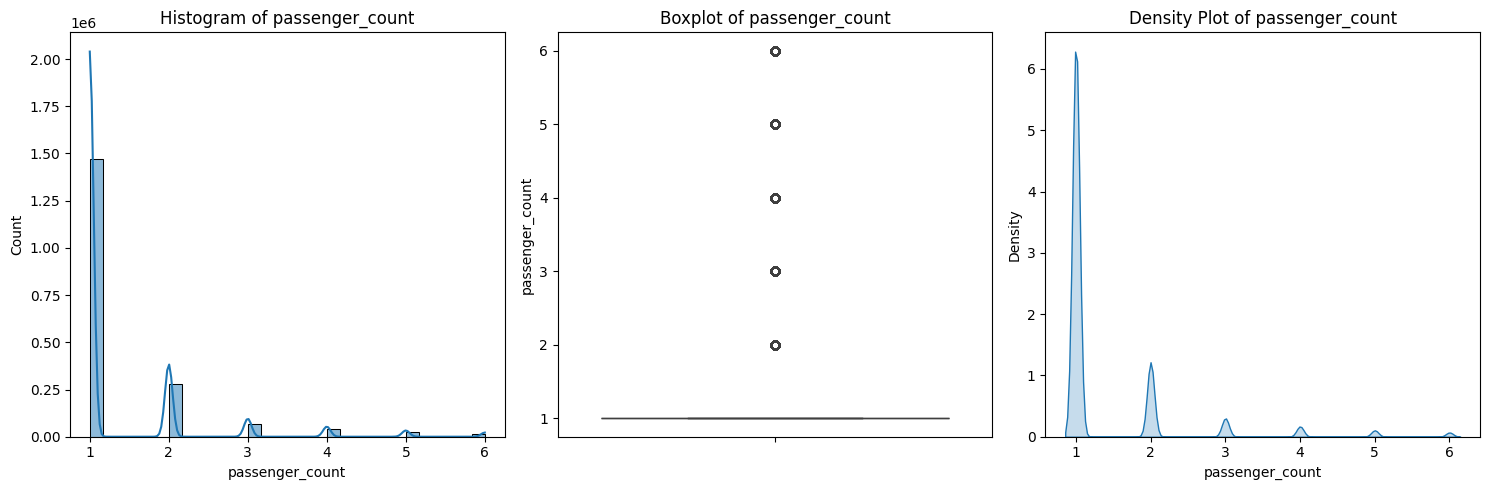

Column: trip_distance
Number of outliers: 0
Percentage of outliers: 0.00%



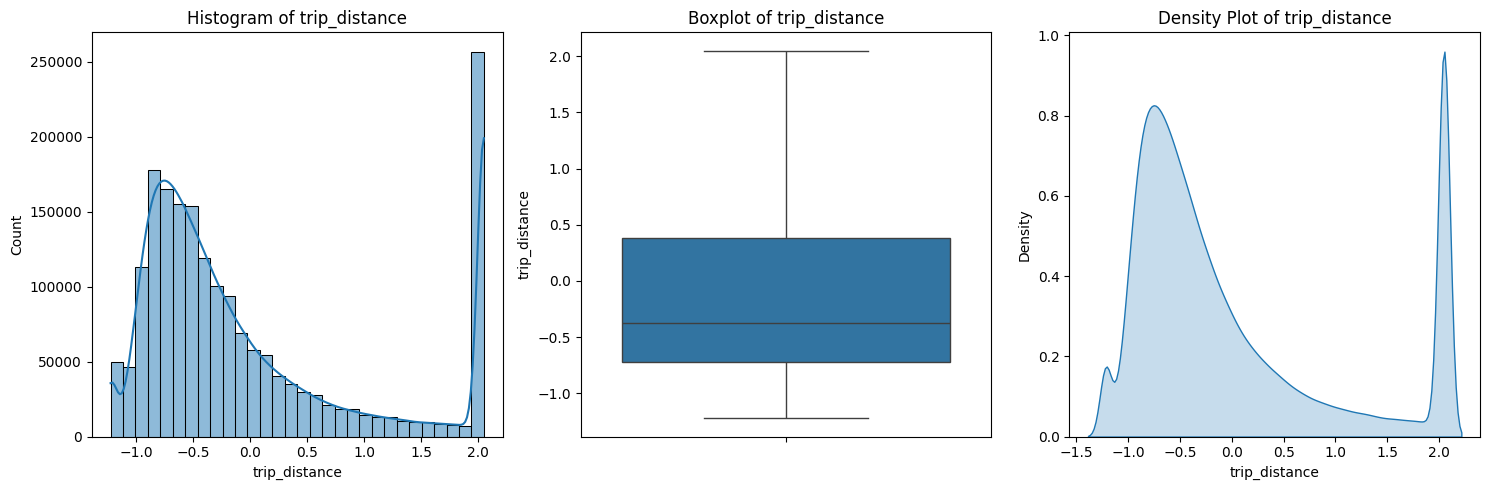

Column: fare_amount
Number of outliers: 202214
Percentage of outliers: 10.67%



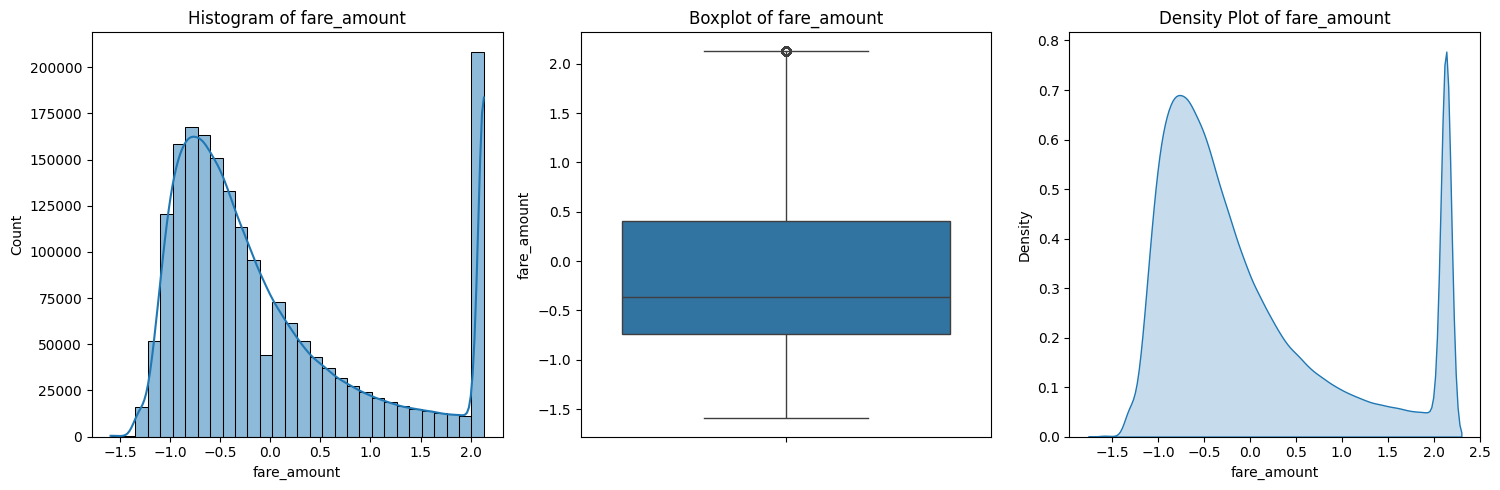

Column: extra
Number of outliers: 0
Percentage of outliers: 0.00%



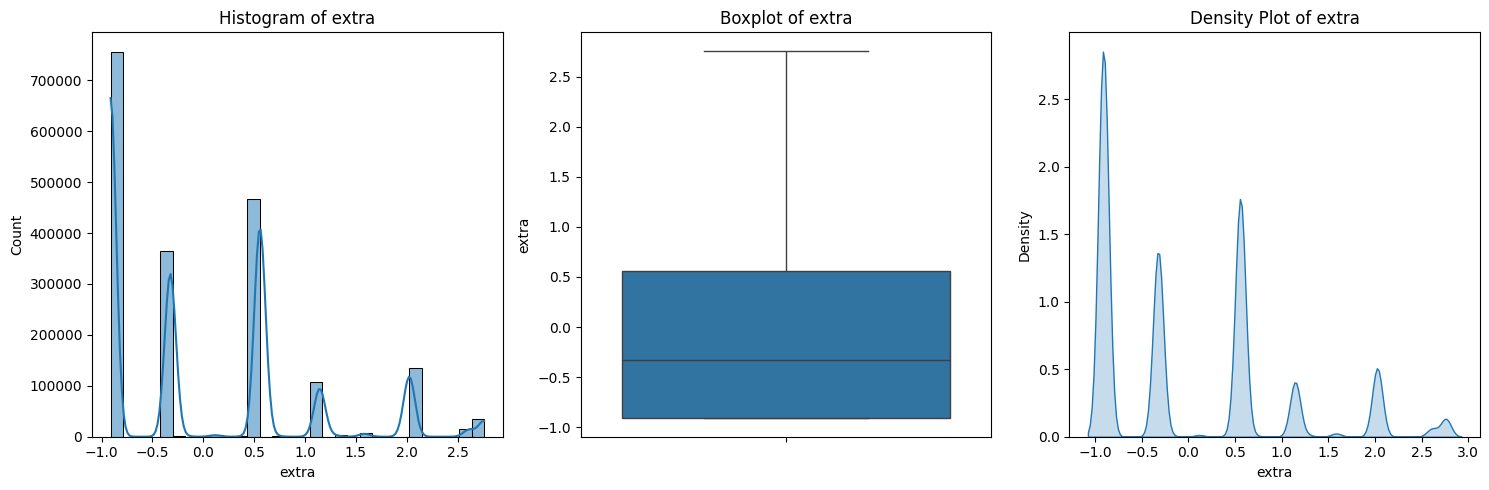

Column: mta_tax
Number of outliers: 0
Percentage of outliers: 0.00%



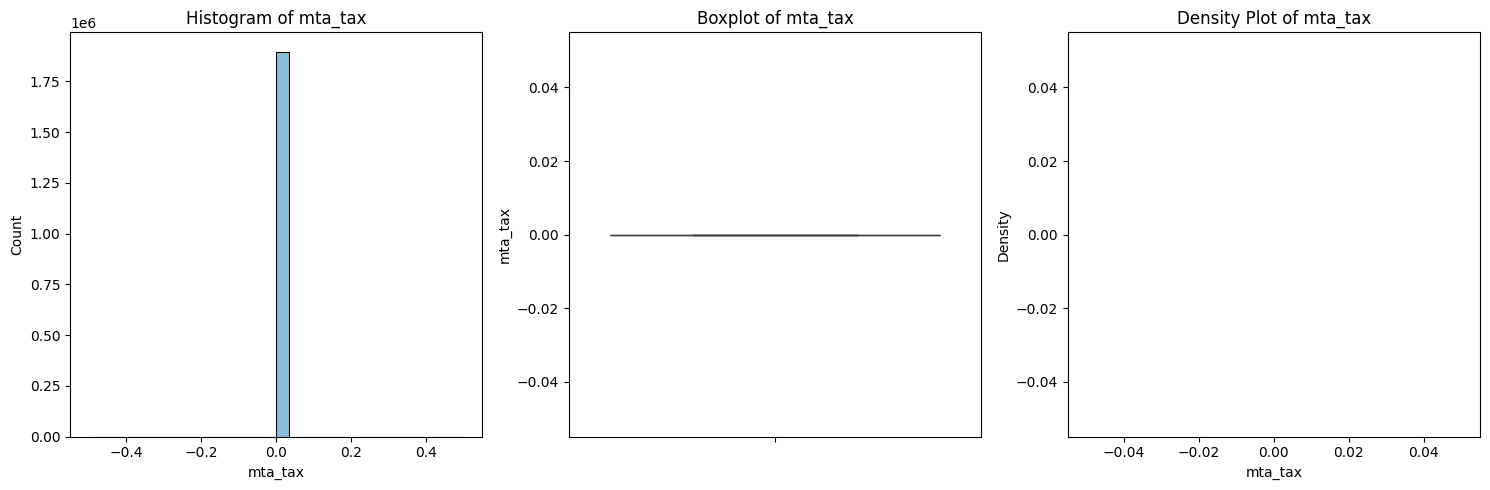

Column: tip_amount
Number of outliers: 145878
Percentage of outliers: 7.69%



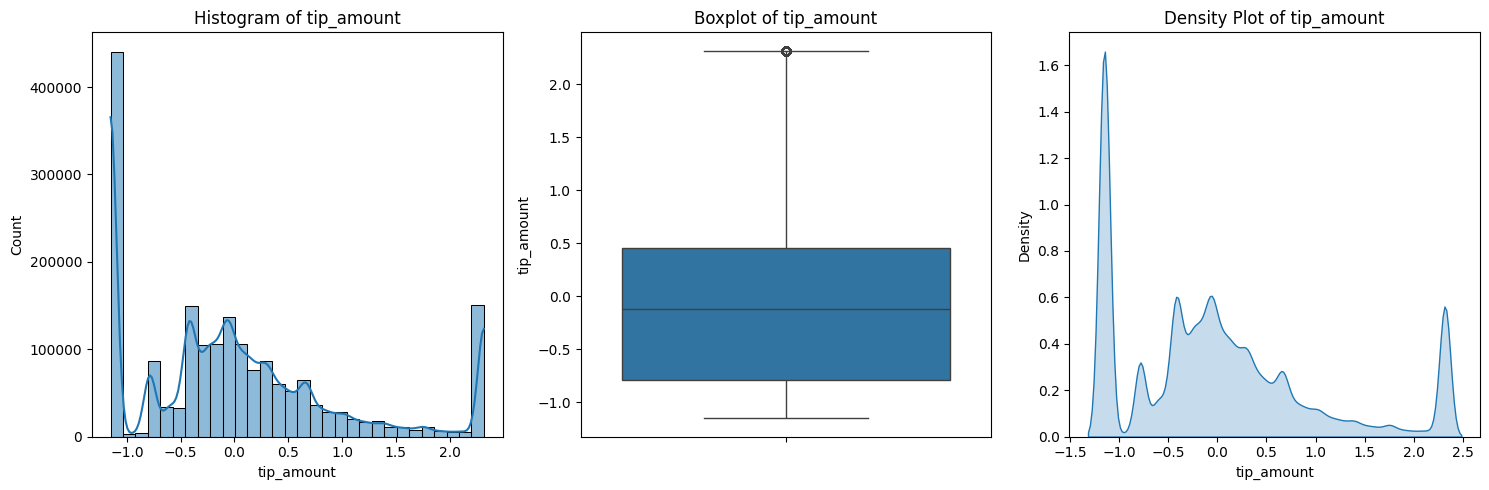

Column: tolls_amount
Number of outliers: 0
Percentage of outliers: 0.00%



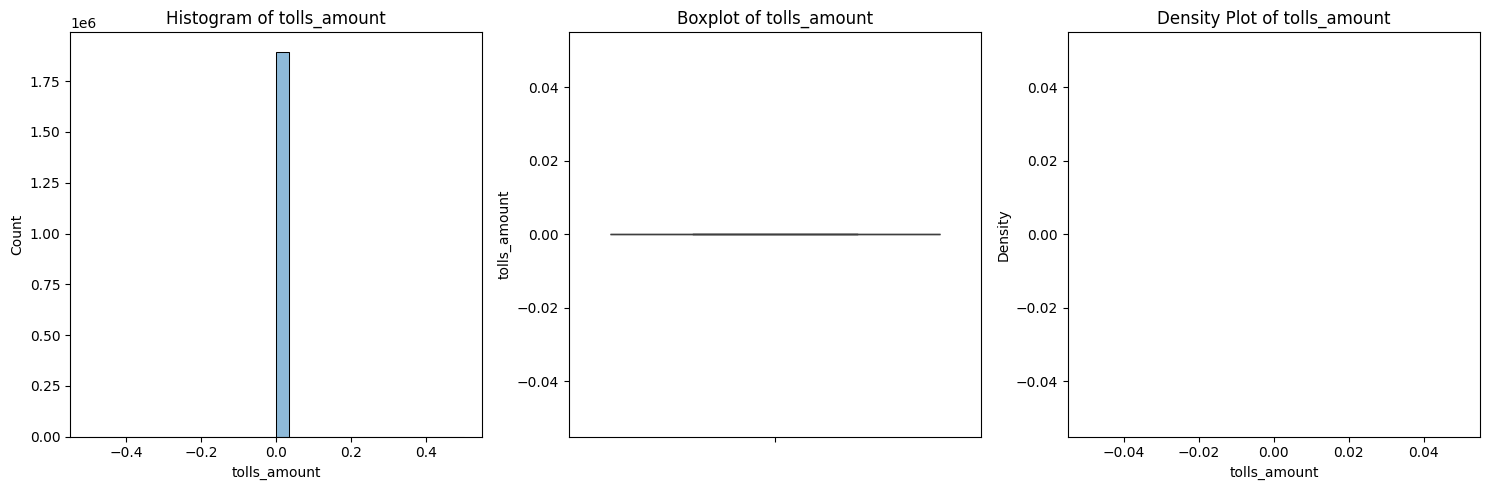

Column: improvement_surcharge
Number of outliers: 0
Percentage of outliers: 0.00%



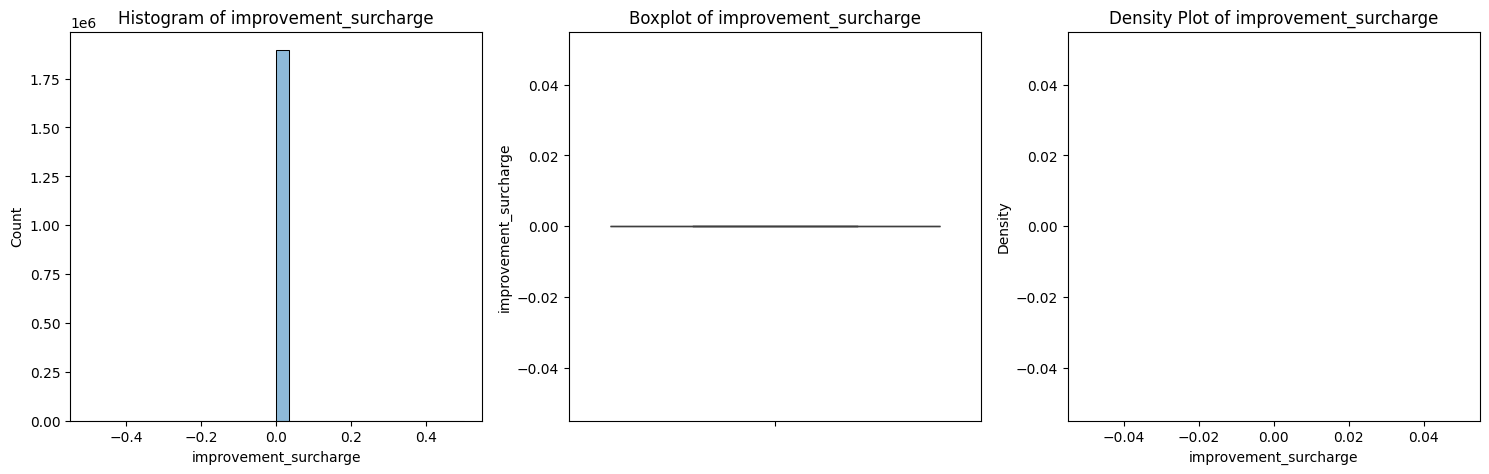

Column: total_amount
Number of outliers: 0
Percentage of outliers: 0.00%



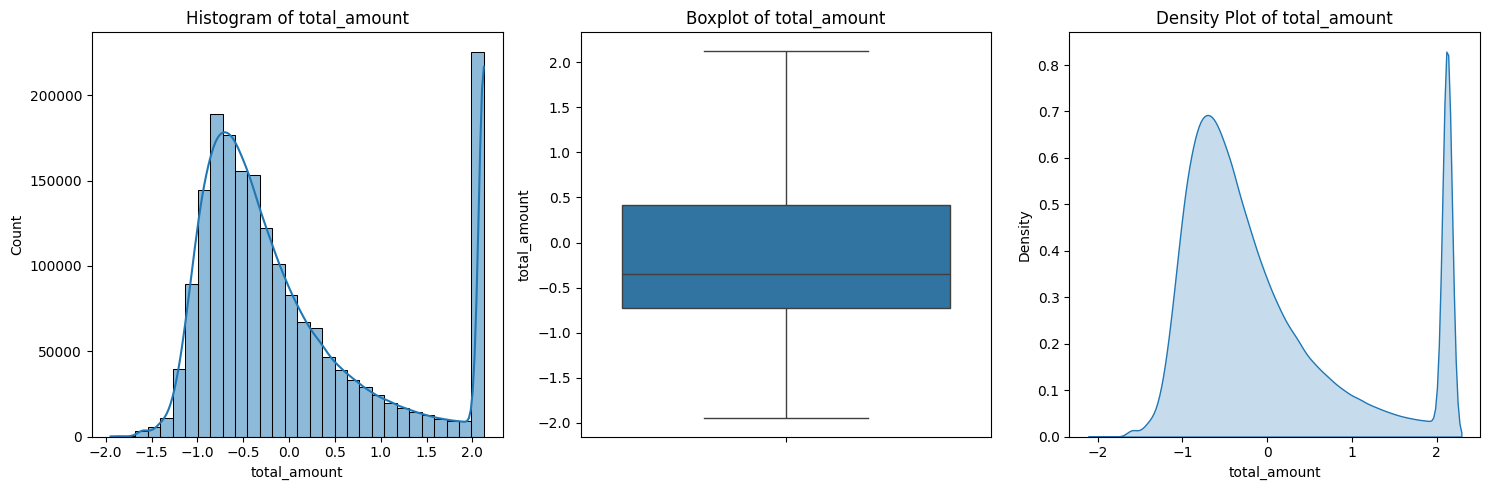

Column: congestion_surcharge
Number of outliers: 0
Percentage of outliers: 0.00%



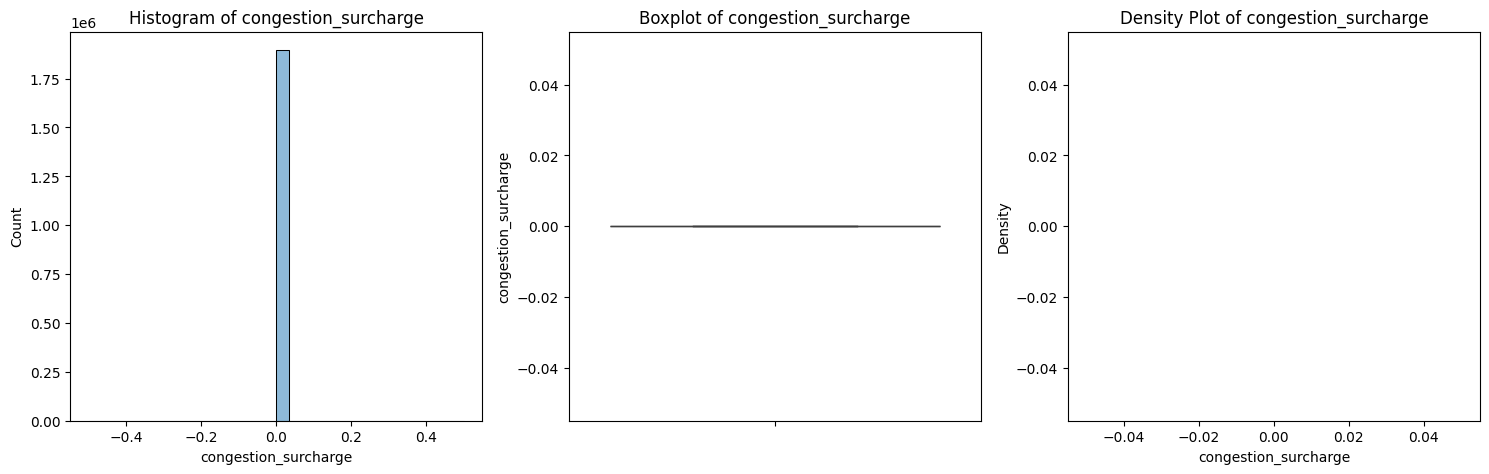

Column: hour
Number of outliers: 0
Percentage of outliers: 0.00%



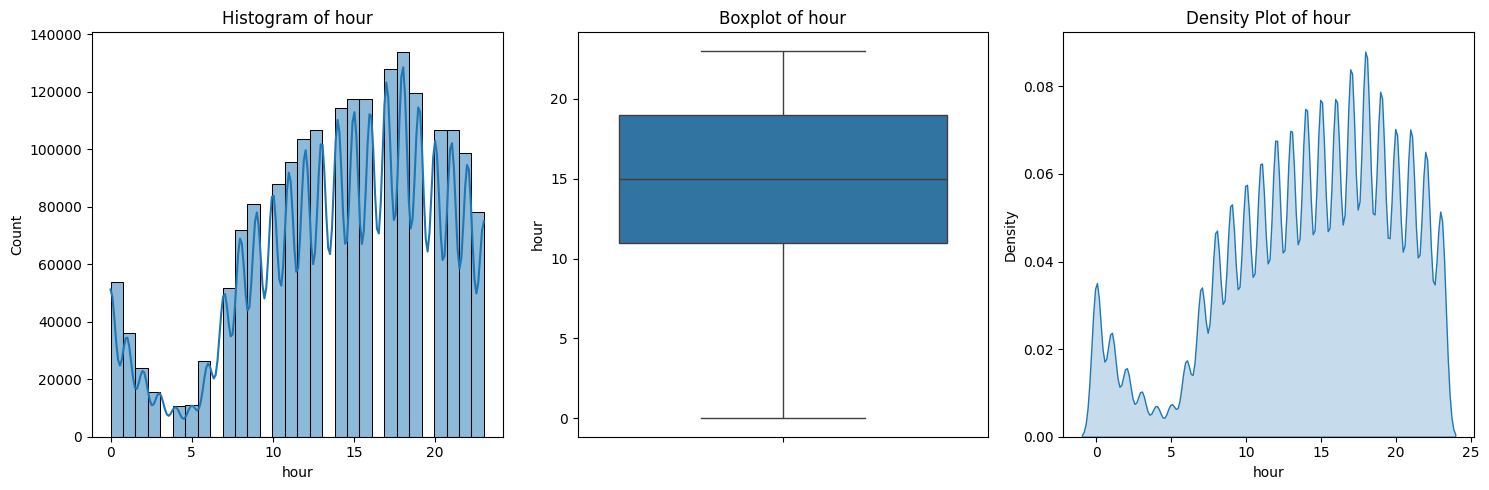

Column: airport_fee
Number of outliers: 0
Percentage of outliers: 0.00%



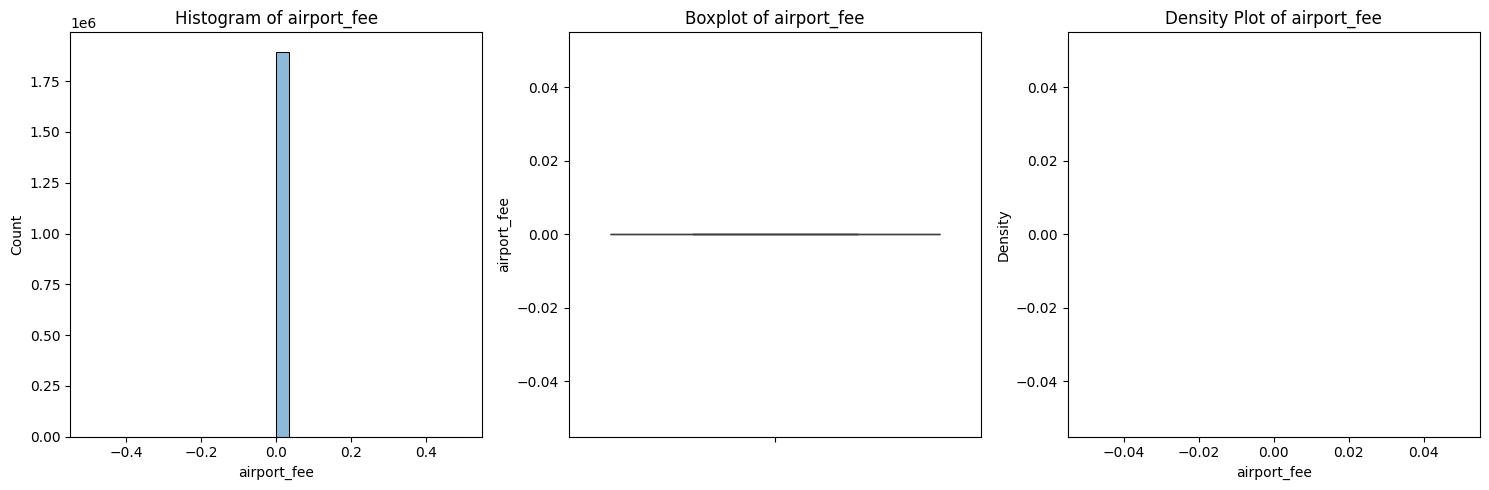

Column: trip_duration
Number of outliers: 113381
Percentage of outliers: 5.98%



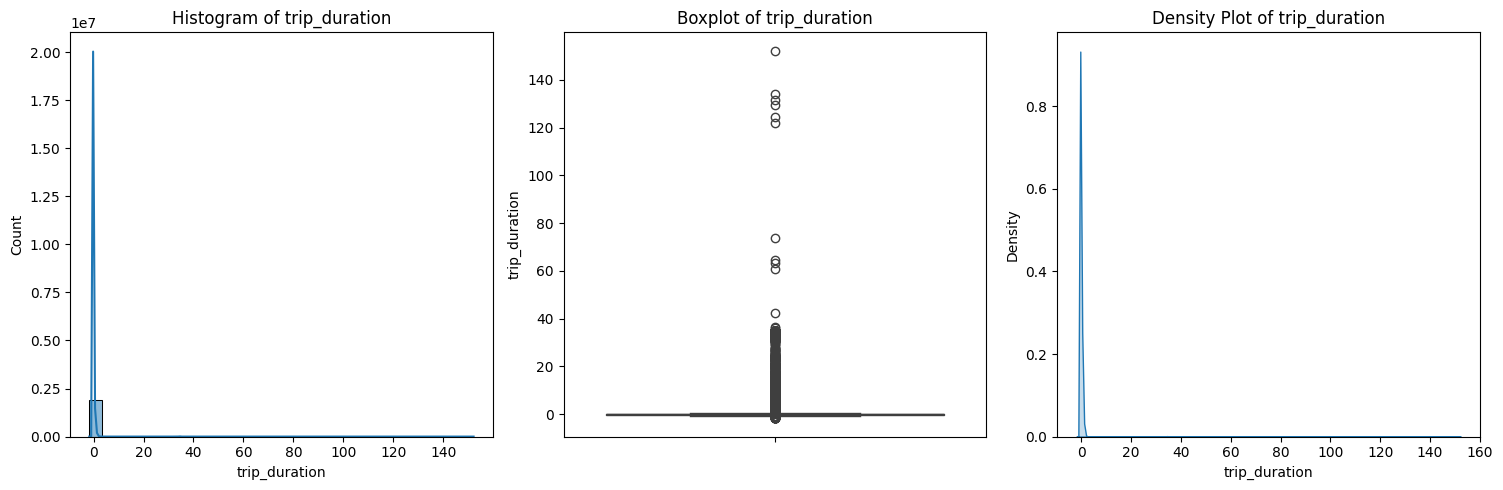

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

#def show_all_outliers(df):
#    num_cols = df.select_dtypes(include=["number"]).columns  # Select numerical columns

def show_selected_outliers(df, exclude_columns, draw_plot):
    # Select numerical columns excluding specified ones
    num_cols = [col for col in df.select_dtypes(include=["number"]).columns if col not in exclude_columns]
    
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        print(f"Column: {col}")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers)/len(df)) * 100:.2f}%\n")
        
        # Only plot if draw_plot is 'Y'
        if draw_plot == 'Y':
            plt.figure(figsize=(15, 5))

            # Histogram
            plt.subplot(1, 3, 1)
            sns.histplot(df[col], bins=30, kde=True)
            plt.title(f'Histogram of {col}')

            # Boxplot
            plt.subplot(1, 3, 2)
            sns.boxplot(y=df[col])
            plt.title(f'Boxplot of {col}')
            #plt.xlabel(col) 

            # KDE Plot
            plt.subplot(1, 3, 3)
            sns.kdeplot(df[col], fill=True)
            plt.title(f'Density Plot of {col}')

            plt.tight_layout()
            plt.show()

# Define columns to exclude
exclude_cols = ["vendorid", "ratecodeid", "pulocationid", "dolocationid", 
                "payment_type", "pickup_day", "pickup_month", "pickup_year"]

# Run function without plotting (ONLY PRINT OUTLIER STATS)
#show_selected_outliers(df_non_negative, exclude_cols, draw_plot='N')  # ✅ No plots, only prints

# Run function with plotting (PRINT OUTLIER STATS + SHOW PLOTS)
show_selected_outliers(df_non_negative, exclude_cols, draw_plot='Y')  # ✅ Plots + prints

#show_all_outliers(df_non_negative)



#### Visualize Categorical Data


Column: vendorid
vendorid
2    1387719
1     507815
6        444
Name: count, dtype: int64


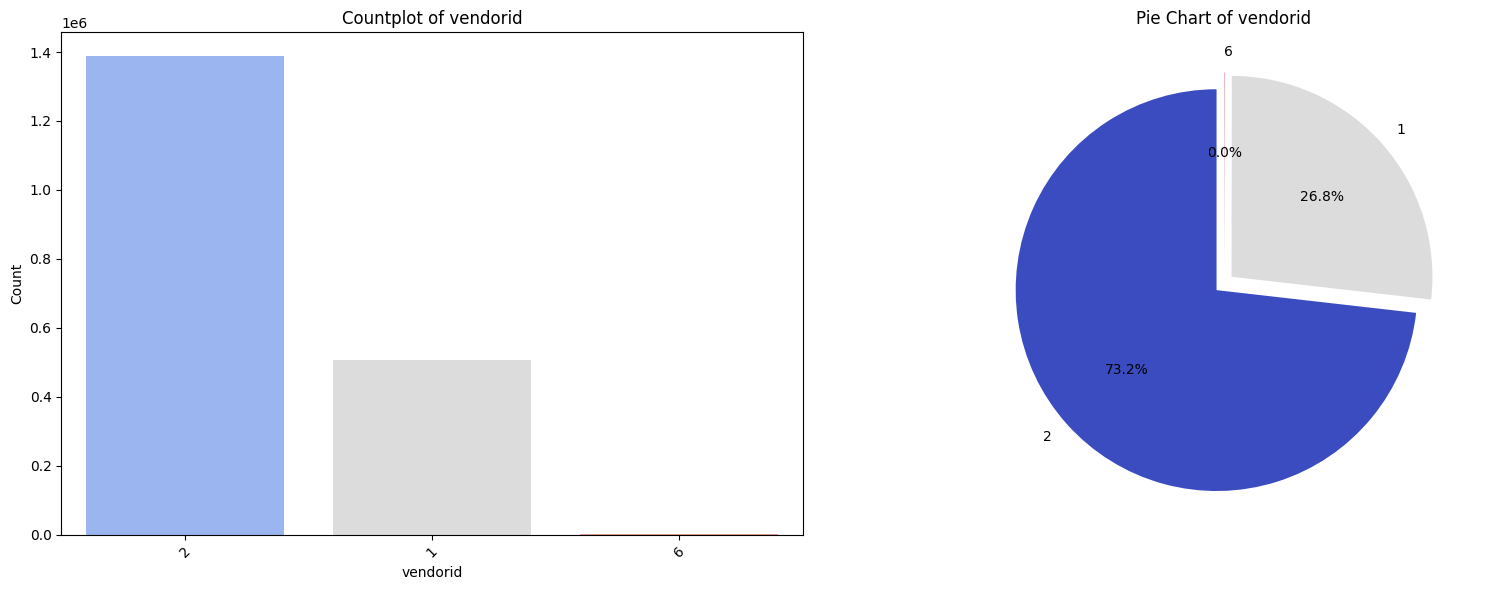


Column: ratecodeid
ratecodeid
1.0    1804269
2.0      71638
5.0      10225
3.0       6122
4.0       3721
6.0          3
Name: count, dtype: int64


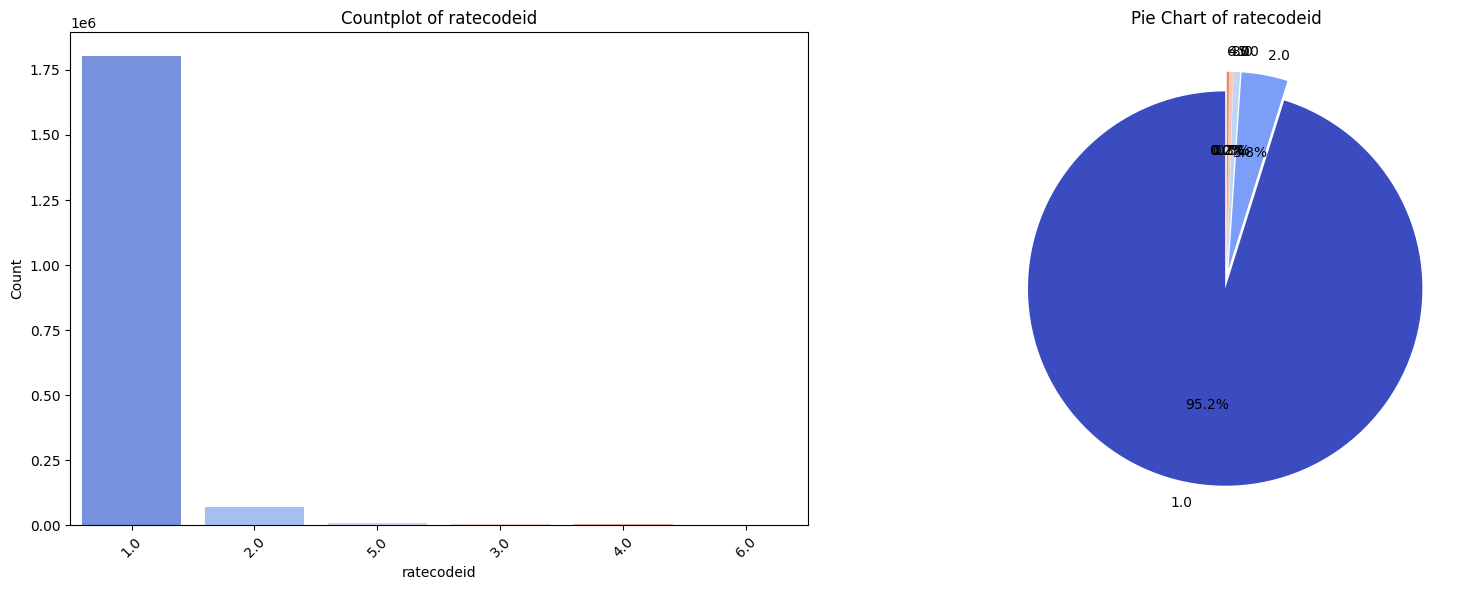


Column: payment_type
payment_type
1    1451270
2     407247
4      37461
Name: count, dtype: int64


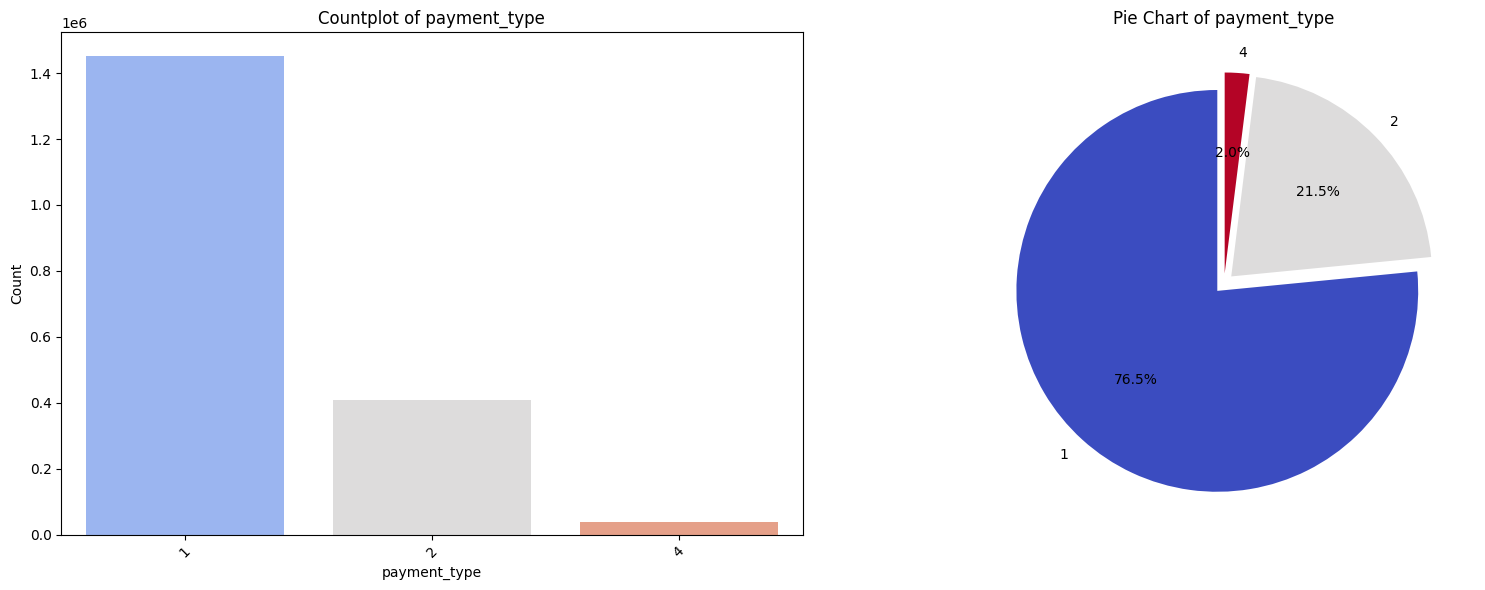

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distribution(df, selected_columns, draw_plot):
    """
    Plots Countplot and Pie Chart for selected categorical columns.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    selected_columns (list): List of categorical columns to visualize.
    draw_plot (str): 'Y' to plot graphs, 'N' to skip plotting.
    """
    
    for col in selected_columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())  # Print category counts
        
        if draw_plot == 'Y':
            fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1.2, 1.8]})
            
            # Countplot (smaller)
            sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm", ax=axes[0])
            axes[0].set_title(f'Countplot of {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel("Count")
            axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
            
            # Pie Chart (bigger)
            df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                            cmap="coolwarm", explode=[0.05]*df[col].nunique(), ax=axes[1])
            axes[1].set_title(f'Pie Chart of {col}')
            axes[1].set_ylabel("")  # Hide y-label for pie chart
            
            plt.tight_layout()
            plt.show()

# Define categorical columns for visualization
categorical_columns = ["vendorid", "ratecodeid", "payment_type"]

# Run function with plotting
plot_categorical_distribution(df_non_negative, categorical_columns, draw_plot='Y')


#### Handling Outliers For Numerical Columns (Ordinal)

In [65]:
print(df_non_negative["payment_type"].value_counts())

payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64


In [66]:
import pandas as pd

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df[column] = df[column].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
    return df

# Select only numeric columns to be capped in quartile range
#numeric_cols = df_non_negative.select_dtypes(include=['number']).columns

# Apply outlier capping to all numeric columns
''' 
for col in numeric_cols:
    df_non_negative = cap_outliers(df_non_negative, col)
'''     
# List of specific numerical columns to cap
num_cols_to_cap = [
    "trip_distance", "trip_duration", "fare_amount", "extra", "mta_tax",
    "tip_amount", "tolls_amount", "improvement_surcharge", 
    "total_amount", "congestion_surcharge", "airport_fee"
]
    
# Apply outlier capping only to the selected columns
for col in num_cols_to_cap:
    if col in df_non_negative.columns:  # Ensure the column exists before applying
        df_non_negative = cap_outliers(df_non_negative, col)
        
# Display summary statistics after capping
df_non_negative.describe()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,airport_fee
count,1.896400e+06,1896400,1896400,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1896400.0,1.896400e+06,1896400.0,1896400.0,1.896400e+06,1896400.0,1.896400e+06,1896400.0
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919563,1.372236e+00,2.586798e+00,1.071821e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.744774e+01,1.551264e+00,0.5,3.168323e+00,0.0,1.0,2.553614e+01,2.5,1.426504e+01,0.0
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.5,0.000000e+00,0.0,1.0,0.000000e+00,2.5,0.000000e+00,0.0
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,0.5,1.000000e+00,0.0,1.0,1.596000e+01,2.5,1.100000e+01,0.0
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,0.5,2.850000e+00,0.0,1.0,2.100000e+01,2.5,1.500000e+01,0.0
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,0.5,4.420000e+00,0.0,1.0,3.094000e+01,2.5,1.900000e+01,0.0
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,6.925000e+00,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,4.080000e+01,6.250000e+00,0.5,9.550000e+00,0.0,1.0,5.341000e+01,2.5,2.300000e+01,0.0
std,4.476401e-01,NaN,NaN,8.644038e-01,2.117181e+00,3.872343e-01,6.400038e+01,6.980207e+01,5.081384e-01,1.095673e+01,1.702651e+00,0.0,2.752683e+00,0.0,0.0,1.311617e+01,0.0,5.807381e+00,0.0


#### Again check the outlier counts

In [67]:
print(df_non_negative["payment_type"].value_counts())

payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64


In [131]:
show_selected_outliers(df_non_negative, exclude_cols,draw_plot='N')

Column: passenger_count
Number of outliers: 424560
Percentage of outliers: 22.39%

Column: trip_distance
Number of outliers: 0
Percentage of outliers: 0.00%

Column: fare_amount
Number of outliers: 202214
Percentage of outliers: 10.67%

Column: extra
Number of outliers: 0
Percentage of outliers: 0.00%

Column: mta_tax
Number of outliers: 0
Percentage of outliers: 0.00%

Column: tip_amount
Number of outliers: 145878
Percentage of outliers: 7.69%

Column: tolls_amount
Number of outliers: 0
Percentage of outliers: 0.00%

Column: improvement_surcharge
Number of outliers: 0
Percentage of outliers: 0.00%

Column: total_amount
Number of outliers: 0
Percentage of outliers: 0.00%

Column: congestion_surcharge
Number of outliers: 0
Percentage of outliers: 0.00%

Column: hour
Number of outliers: 0
Percentage of outliers: 0.00%

Column: airport_fee
Number of outliers: 0
Percentage of outliers: 0.00%

Column: trip_duration
Number of outliers: 113381
Percentage of outliers: 5.98%



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

In [69]:
df_non_negative["payment_type"].value_counts()

payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

#### Check Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300

In [70]:
df_non_negative[ (   (df_non_negative["trip_distance"] == 0) &  (df_non_negative["fare_amount"] > 300)   )]
df_non_negative = df_non_negative[~((df_non_negative["trip_distance"] == 0) & (df_non_negative["fare_amount"] > 300))]


#### Check Entries Where trip_distance and fare_amount are 0 but Pickup & Dropoff Zones are Different

In [71]:
df_non_negative[ (   (df_non_negative["trip_distance"] == 0) &  (df_non_negative["fare_amount"] == 0)   & 
                                    (df_non_negative["pulocationid"] != df_non_negative["dolocationid"]) )]
df_non_negative = df_non_negative[ ~(   (df_non_negative["trip_distance"] == 0) &  (df_non_negative["fare_amount"] == 0)   & 
                                    (df_non_negative["pulocationid"] != df_non_negative["dolocationid"]) )]

#### Check Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

In [72]:
df_non_negative["payment_type"].value_counts()

payment_type
1    1492356
2     316423
0      64871
4      13677
3       9010
Name: count, dtype: int64

In [73]:
# checking for no 3 = No charge and compare with 0 value with respect to total_amount and trip_distance and tip_amount
# as tip_amount is populated for credit card payment type
df_non_negative [ ( (df_non_negative["payment_type"] == 3) | (df_non_negative["payment_type"] == 0) ) ][["payment_type","total_amount", "trip_distance" ,"tip_amount"]]

,payment_type,total_amount,trip_distance,tip_amount
5,0,35.57,6.925,5.93
16,0,53.41,6.925,9.55
43,0,29.38,4.520,0.00
44,0,46.20,6.925,2.20
47,0,25.85,2.740,3.37
...,...,...,...,...
1896356,0,38.02,0.000,0.00
1896369,0,25.50,0.000,0.00
1896376,0,25.28,3.500,0.00
1896387,0,19.68,0.000,0.00


#### based on the above result we can categorise into following brackets
1. trip_distance=0 and total_amount<> 0 then no meaning of payment_type.Impute payment_type = 4 (Dispute)
2. trip_distance<> 0 and total_amount<> 0 and tip_amount = 0 then Impute payment_type = 2 (Cash)
3. trip_distance<> 0 and total_amount<> 0 and tip_amount <> 0 then Impute payment_type = 1 (Credit card) from Mode()

# Need to chek df_non_negative["payment_type"].value_counts() value is not correct

In [74]:
# Condition 1: ( trip_distance = 0 and total_amount != 0) or (trip_distance != 0 and total_amount = 0) → Impute payment_type = 4 (Dispute)
df_non_negative.loc[
    ((df_non_negative["trip_distance"] == 0) & (df_non_negative["total_amount"] != 0)) |
    ((df_non_negative["trip_distance"] != 0) & (df_non_negative["total_amount"] == 0)), 
    "payment_type"
] = 4

# Verify the changes
print(df_non_negative["payment_type"].value_counts())

payment_type
1    1479445
2     309956
0      50169
4      49898
3       6869
Name: count, dtype: int64


In [75]:

# Condition 2: trip_distance ≠ 0 and total_amount != 0 and tip_amount = 0 → Impute payment_type = 2 (Cash)
df_non_negative.loc[(df_non_negative["trip_distance"] != 0) & 
                    (df_non_negative["total_amount"] != 0) & 
                    (df_non_negative["tip_amount"] == 0), "payment_type"] = 2


# Verify the changes
print(df_non_negative["payment_type"].value_counts())

payment_type
1    1412975
2     407317
0      38344
4      37659
3         42
Name: count, dtype: int64


In [76]:
# Condition 3: trip_distance ≠ 0 and total_amount != 0 and tip_amount ≠ 0 → Impute payment_type = 1 (Credit Card)
df_non_negative.loc[(df_non_negative["trip_distance"] != 0) & 
                    (df_non_negative["total_amount"] != 0) & 
                    (df_non_negative["tip_amount"] != 0), "payment_type"] = 1

# Verify the changes
print(df_non_negative["payment_type"].value_counts())

payment_type
1    1451363
2     407294
4      37643
3         35
0          2
Name: count, dtype: int64


In [77]:
#susom_break.head()

In [78]:
# check record for "payment_type" = 0
df_non_negative [  (df_non_negative["payment_type"] == 0)  ][["payment_type","total_amount", "trip_distance" ,"tip_amount"]]

,payment_type,total_amount,trip_distance,tip_amount
127780,0,0.0,0.0,0.0
1718629,0,0.0,0.0,0.0


In [79]:
# remove passenger_count > 6
df_non_negative = df_non_negative [~ (df_non_negative["passenger_count"] > 6) ] 

In [80]:
# remove records for which total_amount=0 and trip_distance=0
df_non_negative = df_non_negative [~ ( (df_non_negative["total_amount"] == 0) & (df_non_negative["trip_distance"] == 0) ) ] 

In [81]:
# Continue with outlier handling

# checkand remove the records where total_amount=0 but trip_distance !=0 
df_non_negative = df_non_negative[ (df_non_negative['total_amount'] != 0)  ]
df_non_negative[ (df_non_negative['total_amount'] == 0)  ][["payment_type","total_amount", "trip_distance" ,"tip_amount"]]


,payment_type,total_amount,trip_distance,tip_amount


#### # Do any columns need standardising?
   Yes : Columns have different scales (e.g., trip_distance vs. fare_amount).

In [82]:
print(df_non_negative['trip_distance'].value_counts())
print(df_non_negative['total_amount'].value_counts())

trip_distance
6.925    249264
0.000     37461
0.900     25797
1.000     25757
1.100     25457
          ...  
6.830       213
6.920       210
6.740       209
6.910       209
6.780       206
Name: count, Length: 694, dtype: int64
total_amount
53.41    218071
16.80     27066
12.60     24598
21.00     22577
18.00     14370
          ...  
3.90          1
51.01         1
48.71         1
5.41          1
6.84          1
Name: count, Length: 4757, dtype: int64


In [83]:
df_non_negative["trip_duration"] = (df_non_negative["tpep_dropoff_datetime"] - df_non_negative["tpep_pickup_datetime"]).dt.total_seconds() / 60 

In [84]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for standardization
num_cols_to_standardize = [
    "trip_distance", "trip_duration", "fare_amount", "extra", "mta_tax",
    "tip_amount", "tolls_amount", "improvement_surcharge", 
    "total_amount", "congestion_surcharge", "airport_fee"
]

# Initialize scaler
scaler = StandardScaler()

# Apply standardization
df_non_negative[num_cols_to_standardize] = scaler.fit_transform(df_non_negative[num_cols_to_standardize])

# Check summary after standardization
df_non_negative.describe()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,airport_fee,trip_duration
count,1.895978e+06,1895978,1895978,1.895978e+06,1.895978e+06,1.895978e+06,1.895978e+06,1.895978e+06,1.895978e+06,1.895978e+06,1.895978e+06,1895978.0,1.895978e+06,1895978.0,1895978.0,1.895978e+06,1895978.0,1.895978e+06,1895978.0,1.895978e+06
mean,1.733099e+00,2023-07-02 20:00:46.679924,2023-07-02 20:18:12.755105,1.372204e+00,4.431500e-16,1.071710e+00,1.652819e+02,1.640497e+02,1.274070e+00,-4.738506e-16,-3.008899e-16,0.0,-2.187867e-16,0.0,0.0,-8.004941e-16,0.0,1.426519e+01,0.0,-1.916202e-16
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,-1.222046e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.593027e+00,-9.112678e-01,0.0,-1.151284e+00,0.0,0.0,-1.947152e+00,0.0,0.000000e+00,0.0,-1.746771e+00
25%,1.000000e+00,2023-04-02 16:11:56.500000,2023-04-02 16:30:59.250000,1.000000e+00,-7.260734e-01,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,-7.440783e-01,-9.112678e-01,0.0,-7.879842e-01,0.0,0.0,-7.307162e-01,0.0,1.100000e+01,0.0,-2.378535e-01
50%,2.000000e+00,2023-06-27 15:46:19,2023-06-27 16:02:33,1.000000e+00,-3.718071e-01,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,-3.606822e-01,-3.239573e-01,0.0,-1.158798e-01,0.0,0.0,-3.463378e-01,0.0,1.500000e+01,0.0,-1.156953e-01
75%,2.000000e+00,2023-10-06 19:35:58.250000,2023-10-06 19:52:00.250000,1.000000e+00,3.839612e-01,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,4.061098e-01,5.570085e-01,0.0,4.545007e-01,0.0,0.0,4.117420e-01,0.0,1.900000e+01,0.0,7.910854e-02
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,6.000000e+00,2.049013e+00,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.131392e+00,2.759423e+00,0.0,2.318228e+00,0.0,0.0,2.125429e+00,0.0,2.300000e+01,0.0,1.521649e+02
std,4.476033e-01,NaN,NaN,8.641558e-01,1.000000e+00,3.867149e-01,6.399960e+01,6.980109e+01,5.634754e-01,1.000000e+00,1.000000e+00,0.0,1.000000e+00,0.0,0.0,1.000000e+00,0.0,5.807537e+00,0.0,1.000000e+00


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [85]:
df_non_negative.columns.tolist()

['vendorid',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'store_and_fwd_flag',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'airport_fee',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

####

Numerical Variables (Continuous or Discrete Numeric Data) : These variables represent numerical values that can be measured or counted.

passenger_count       (Discrete)
trip_distance         (Continuous)
pickup_hour           (Discrete)
trip_duration         (Continuous)
fare_amount           (Continuous)
extra                 (Continuous)
mta_tax               (Continuous)
tip_amount            (Continuous)
tolls_amount          (Continuous)
improvement_surcharge (Continuous)
total_amount          (Continuous)
congestion_surcharge  (Continuous)
airport_fee           (Continuous)


Categorical Variables (Nominal or Ordinal Data): These variables represent categories or labels.

VendorID              (Nominal)
tpep_pickup_datetime  (Timestamp - Can be used for analysis but is categorical as a label)
tpep_dropoff_datetime (Timestamp - Can be used for analysis but is categorical as a label)
RatecodeID            (Ordinal - Coded categories representing different fare structures)
PULocationID          (Nominal - Represents a categorical pickup location ID)
DOLocationID          (Nominal - Represents a categorical drop location ID)
payment_type          (Nominal - Represents different payment methods)

Regarding Monetary Parameters : The following monetary parameters:
fare_amount   -> numerical
extra         -> numerical
mta_tax       -> categorical ??
tip_amount    -> numerical
tolls_amount  -> numerical
improvement_surcharge  -> categorical ??
total_amount  -> numerical
congestion_surcharge  -> numerical
airport_fee  -> categorical
are Numerical (Continuous) since they represent measured financial values.

In [86]:
# check the values for mta_tax, improvement_surcharge, airport_fee
print(df_non_negative["airport_fee"].value_counts() )
print(df_non_negative["improvement_surcharge"].value_counts() )
print(df_non_negative["mta_tax"].value_counts() )

airport_fee
0.0    1895978
Name: count, dtype: int64
improvement_surcharge
0.0    1895978
Name: count, dtype: int64
mta_tax
0.0    1895978
Name: count, dtype: int64


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [87]:
print(df_non_negative["payment_type"].value_counts())

payment_type
1    1451270
2     407247
4      37461
Name: count, dtype: int64


In [88]:
# Find and show the hourly trends in taxi pickups
df_non_negative["pickup_day"] = df_non_negative["tpep_pickup_datetime"].dt.day
df_non_negative["pickup_month"] = df_non_negative["tpep_pickup_datetime"].dt.month
df_non_negative["pickup_year"] = df_non_negative["tpep_pickup_datetime"].dt.year
#df_non_negative["pickup_dayofweek"] = df_non_negative["tpep_pickup_datetime"].dt.dayofweek
df_non_negative["pickup_dayofweek"] = df_non_negative["tpep_pickup_datetime"].dt.day_name()
df_non_negative

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,total_amount,congestion_surcharge,date,hour,airport_fee,trip_duration,pickup_day,pickup_month,pickup_year,pickup_dayofweek
0,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,-0.815821,1.0,N,141,140,1,...,-0.918330,0.0,2022-12-31,23,0.0,-0.312528,31,12,2022,Saturday
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,2.049013,1.0,N,138,256,2,...,1.190413,0.0,2023-01-01,0,0.0,-0.036150,1,1,2023,Sunday
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,-0.636326,1.0,N,161,237,1,...,-0.767324,0.0,2023-01-01,0,0.0,-0.300759,1,1,2023,Sunday
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,-0.541855,1.0,N,237,141,2,...,-0.697159,0.0,2023-01-01,0,0.0,-0.167643,1,1,2023,Sunday
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,-0.966975,1.0,N,143,142,2,...,-1.070861,0.0,2023-01-01,0,0.0,-0.292642,1,1,2023,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-09-30 23:46:34,2023-09-30 23:53:20,1.0,-0.848886,1.0,N,231,231,1,...,-0.758172,0.0,2023-09-30,23,0.0,-0.259769,30,9,2023,Saturday
1896396,1,2023-09-30 23:44:51,2023-09-30 23:49:05,3.0,-0.985869,1.0,N,158,68,1,...,-0.960276,0.0,2023-09-30,23,0.0,-0.321457,30,9,2023,Saturday
1896397,2,2023-09-30 23:11:05,2023-09-30 23:18:42,1.0,-0.707179,1.0,N,161,162,1,...,-0.639198,0.0,2023-09-30,23,0.0,-0.239071,30,9,2023,Saturday
1896398,1,2023-09-30 23:26:31,2023-10-01 00:04:05,2.0,2.049013,1.0,N,164,14,2,...,2.125429,0.0,2023-09-30,23,0.0,0.490226,30,9,2023,Saturday


In [89]:
### Univariate Analysis : Data Visualization

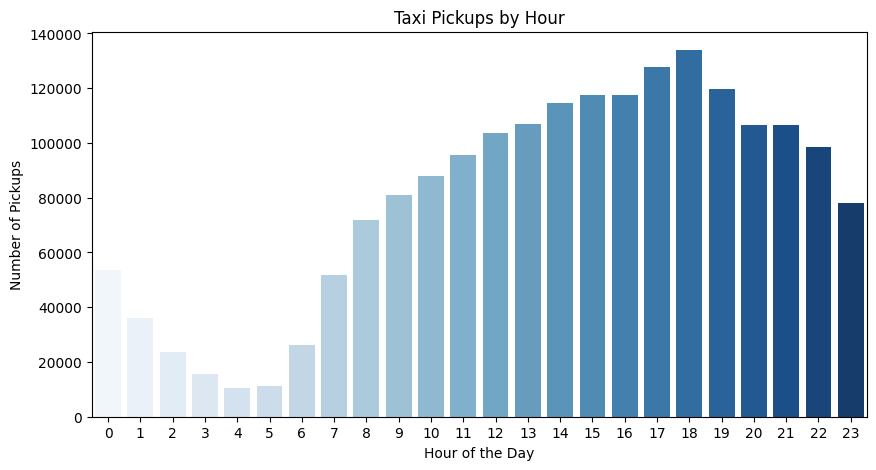

In [90]:
# Taxi Trends throughout the day
import matplotlib.pyplot as plt
import seaborn as sns

# Group by pickup hour and count
hourly_pickups = df_non_negative["hour"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="Blues")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Hour")
plt.xticks(range(24))
plt.show()

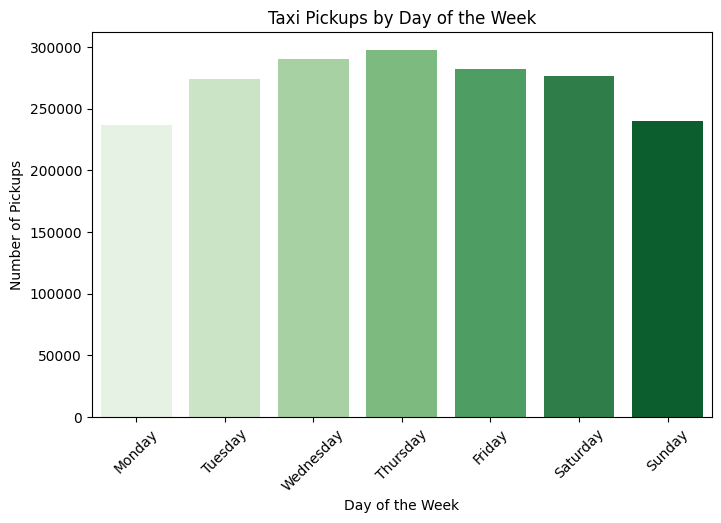

In [91]:
# Find and show the daily trends in taxi pickups (days of the week)

# Group by day of the week and count
daily_pickups = df_non_negative["pickup_dayofweek"].value_counts()

# Order the days correctly
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_pickups = daily_pickups.reindex(order)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="Greens")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Day of the Week")
plt.xticks(rotation=45)
plt.show()

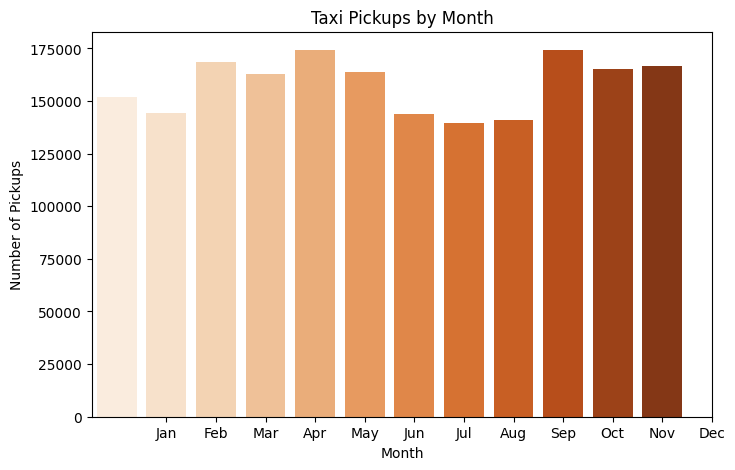

In [92]:
# Show the monthly trends in pickups

# Group by month and count
monthly_pickups = df_non_negative["pickup_month"].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="Oranges")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Month")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [93]:
# Analyse the above parameters
# Select financial and distance-related columns
columns_to_check = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero and negative values
for col in columns_to_check:
    zero_count = (df_non_negative[col] == 0).sum()
    negative_count = (df_non_negative[col] < 0).sum()
    
    print(f"{col}:")
    print(f"  Zero values: {zero_count}")
    print(f"  Negative values: {negative_count}")
    print("-" * 30)


fare_amount:
  Zero values: 0
  Negative values: 1214542
------------------------------
tip_amount:
  Zero values: 0
  Negative values: 1095252
------------------------------
total_amount:
  Zero values: 0
  Negative values: 1218795
------------------------------
trip_distance:
  Zero values: 0
  Negative values: 1253213
------------------------------


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [94]:
print(df_non_negative["payment_type"].value_counts())

payment_type
1    1451270
2     407247
4      37461
Name: count, dtype: int64


In [95]:
# Define the conditions
conditions = {
    "fare_amount = 0": df_non_negative[df_non_negative["fare_amount"] == 0]["payment_type"].value_counts(),
    "fare_amount > 0": df_non_negative[df_non_negative["fare_amount"] > 0]["payment_type"].value_counts(),
    
    "tip_amount = 0": df_non_negative[df_non_negative["tip_amount"] == 0]["payment_type"].value_counts(),
    "tip_amount > 0": df_non_negative[df_non_negative["tip_amount"] > 0]["payment_type"].value_counts(),
    
    "total_amount = 0": df_non_negative[df_non_negative["total_amount"] == 0]["payment_type"].value_counts(),
    "total_amount > 0": df_non_negative[df_non_negative["total_amount"] > 0]["payment_type"].value_counts(),
    
    "trip_distance = 0": df_non_negative[df_non_negative["trip_distance"] == 0]["payment_type"].value_counts(),
    "trip_distance > 0": df_non_negative[df_non_negative["trip_distance"] > 0]["payment_type"].value_counts()
}

# Convert the results into a DataFrame for better readability
payment_type_counts = pd.DataFrame(conditions)

# Fill NaN values with 0 (in case some payment types are missing in specific conditions)
payment_type_counts.fillna(0, inplace=True)

# Print the result
payment_type_counts

,fare_amount = 0,fare_amount > 0,tip_amount = 0,tip_amount > 0,total_amount = 0,total_amount > 0,trip_distance = 0,trip_distance > 0
payment_type,,,,,,,,
1,0.0,512300,0.0,794850.0,0.0,543510,0.0,499185.0
2,0.0,151138,0.0,0.0,0.0,118596,0.0,143580.0
4,0.0,17998,0.0,5876.0,0.0,15077,0.0,0.0


In [96]:
# Create a df with non zero entries for the selected parameters.
df_clean = df_non_negative[
    (df_non_negative["fare_amount"] >= 0) |
    (df_non_negative["tip_amount"] >= 0) |  # Tip amount can be zero
    (df_non_negative["total_amount"] >= 0) |
    (df_non_negative["trip_distance"] >= 0)
].copy()

# Check the new shape
print(f"Original Shape: {df_non_negative.shape}")
print(f"Cleaned Shape: {df_clean.shape}")


Original Shape: (1895978, 26)
Cleaned Shape: (1062480, 26)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [97]:
print(df_clean["payment_type"].value_counts())

payment_type
1    877543
2    165220
4     19717
Name: count, dtype: int64


In [98]:
# Define the conditions
conditions = {
    "fare_amount >= 0": df_clean[df_clean["fare_amount"] >= 0]["payment_type"].value_counts(),
    "tip_amount >= 0": df_clean[df_clean["tip_amount"] >= 0]["payment_type"].value_counts(),
    "total_amount >= 0": df_clean[df_clean["total_amount"] >= 0]["payment_type"].value_counts(),
    "trip_distance >= 0": df_clean[df_clean["trip_distance"] >= 0]["payment_type"].value_counts()
}

# Convert the results into a DataFrame for better readability
payment_type_counts = pd.DataFrame(conditions)

# Fill NaN values with 0 (in case some payment types are missing in specific conditions)
payment_type_counts.fillna(0, inplace=True)

# Print the result
payment_type_counts

,fare_amount >= 0,tip_amount >= 0,total_amount >= 0,trip_distance >= 0
payment_type,,,,
1,512300,794850.0,543510,499185.0
2,151138,0.0,118596,143580.0
4,17998,5876.0,15077,0.0


    Month  Total_Revenue
0       1   43416.732009
1       2   40783.708627
2       3   52760.295578
3       4   53917.510668
4       5   61768.383065
5       6   57637.997389
6       7   49632.543521
7       8   48695.316706
8       9   53769.709563
9      10   63555.798618
10     11   57014.584755
11     12   58177.690307


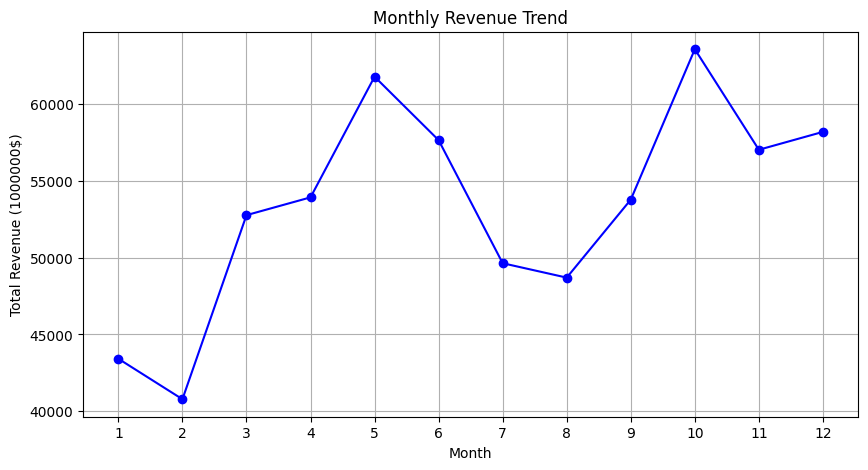

In [99]:
# Group data by month and analyse monthly revenue

# Extract month from datetime
df_clean["month"] = df_clean["tpep_pickup_datetime"].dt.month

# Group by month and sum total revenue
monthly_revenue = df_clean.groupby("month")["total_amount"].sum().reset_index()

# Rename the df columns
monthly_revenue.columns = ["Month", "Total_Revenue"]

# Display the trend
print(monthly_revenue)

# Plot the monthly revenue trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue["Month"], monthly_revenue["Total_Revenue"], marker='o', linestyle='-', color='b')
plt.xlabel("Month")
plt.ylabel("Total Revenue (1000000$)")
plt.title("Monthly Revenue Trend")
plt.xticks(range(1, 13))  # Ensure x-axis has months 1-12
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [100]:
print(df_clean["payment_type"].value_counts())

payment_type
1    877543
2    165220
4     19717
Name: count, dtype: int64


   Quarter  Total_Revenue  Proportion
0        1  136960.736214   21.362388
1        2  173323.891122   27.034114
2        3  152097.569791   23.723349
3        4  178748.073680   27.880149


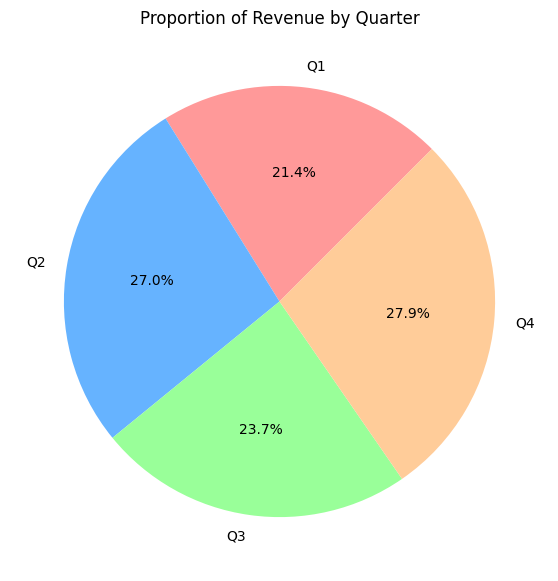

In [101]:
# Calculate proportion of each quarter

import matplotlib.pyplot as plt

# Extract quarter from datetime
df_clean["quarter"] = df_clean["tpep_pickup_datetime"].dt.quarter

# Group by quarter and sum total revenue
quarterly_revenue = df_clean.groupby("quarter")["total_amount"].sum().reset_index()

# Calculate proportion
quarterly_revenue["Proportion"] = (quarterly_revenue["total_amount"] / quarterly_revenue["total_amount"].sum()) * 100

# Rename for clarity
quarterly_revenue.columns = ["Quarter", "Total_Revenue", "Proportion"]

# Display data
print(quarterly_revenue)

# Plot the proportion of each quarter's revenue
plt.figure(figsize=(7, 7))
plt.pie(
    quarterly_revenue["Proportion"], 
    labels=["Q1", "Q2", "Q3", "Q4"], 
    autopct="%1.1f%%", 
    colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"], 
    startangle=45
)
plt.title("Proportion of Revenue by Quarter")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

# DF = df_filtered

In [102]:
df_filtered = df_clean[df_clean["trip_distance"] > 0]

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

#### Bivariate Analysis

##### Derive trip_duration

In [143]:
df_filtered["trip_duration"] = (df_filtered["tpep_dropoff_datetime"] - df_filtered["tpep_pickup_datetime"]).dt.total_seconds() / 60

#### Remove trips with zero or negative tip amounts and trip distances

In [145]:
df_filtered = df_filtered[(df_filtered["trip_distance"] >= 0) & (df_filtered["tip_amount"] >= 0)]
df_filtered = df_filtered[df_filtered["trip_duration"] > 0]


Analyzing relationship between 'trip_duration' and 'fare_amount'
Correlation between trip_duration and fare_amount: 0.24


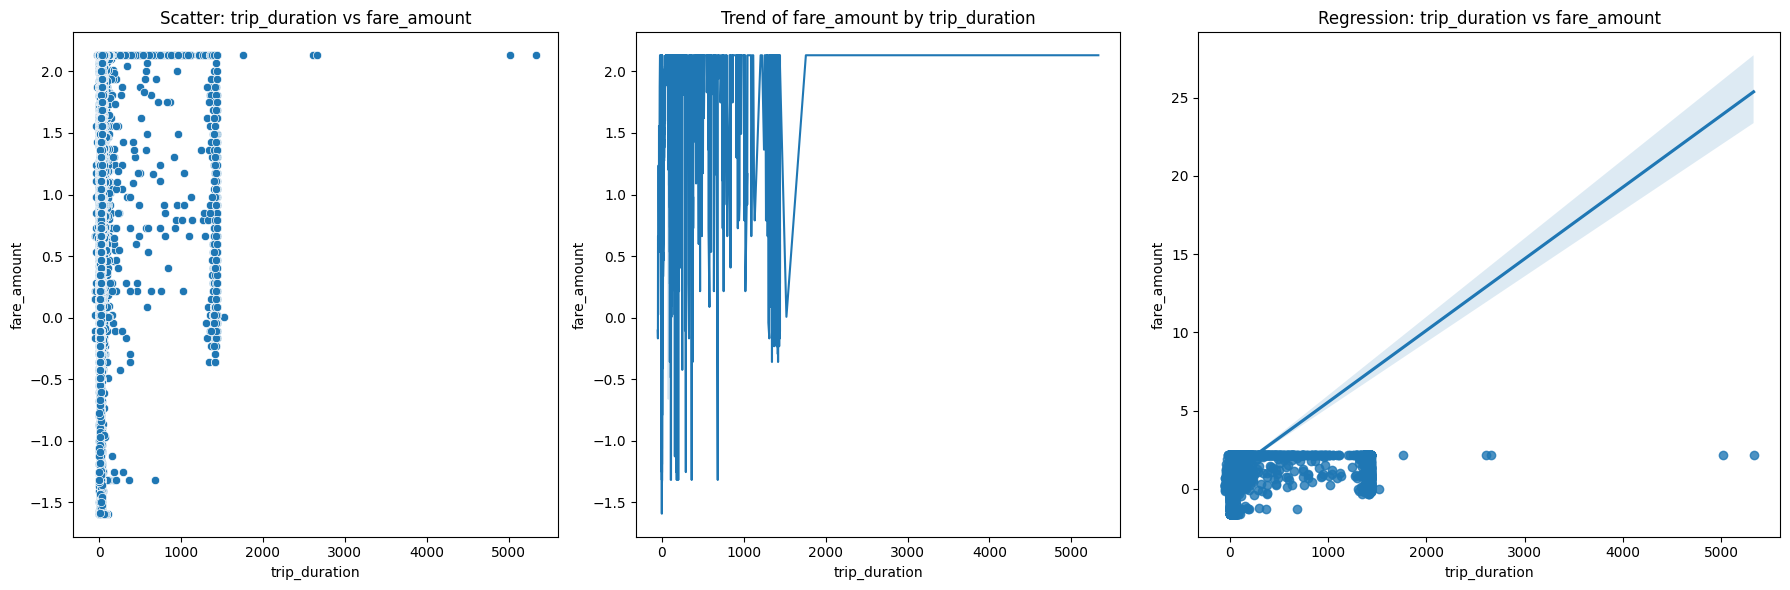


Analyzing relationship between 'fare_amount' and 'passenger_count'
Correlation between fare_amount and passenger_count: 0.04


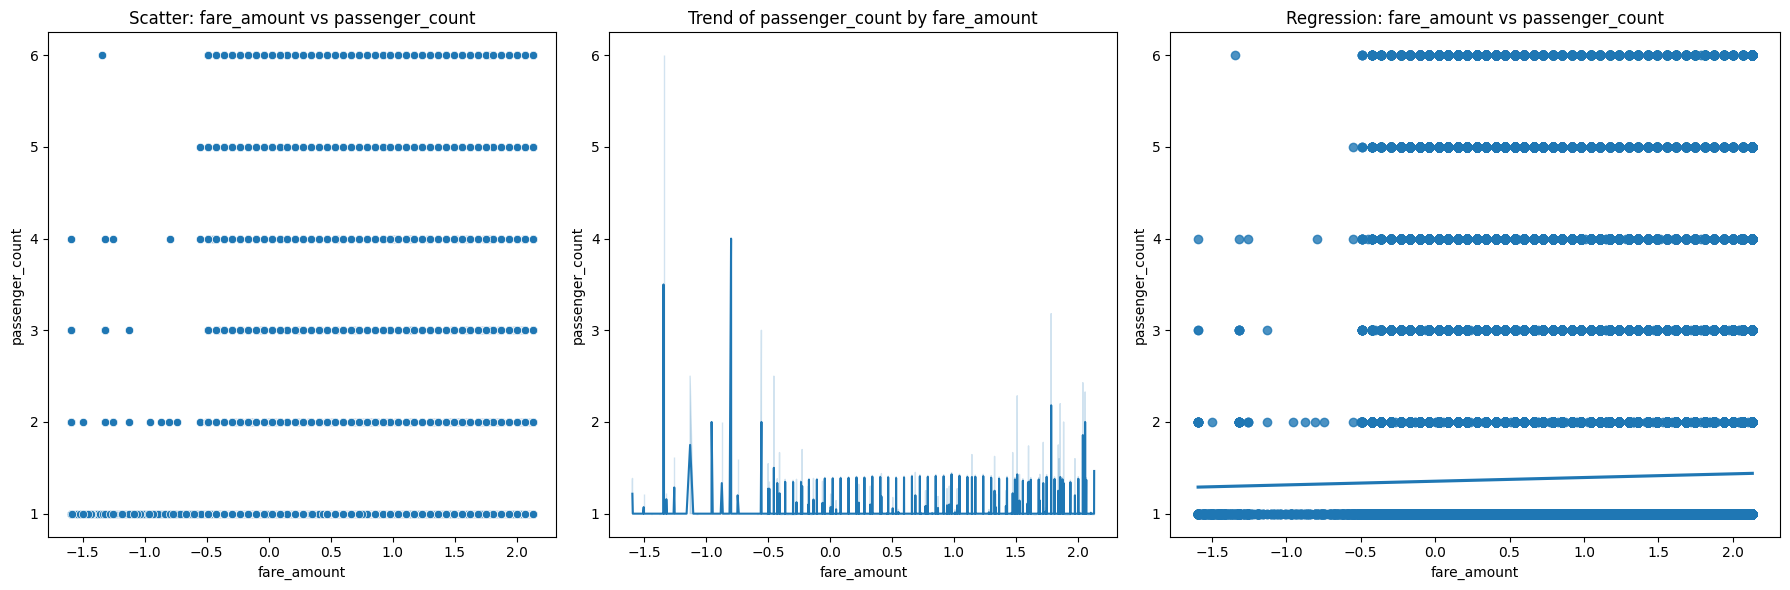


Analyzing relationship between 'tip_amount' and 'trip_distance'
Correlation between tip_amount and trip_distance: 0.35


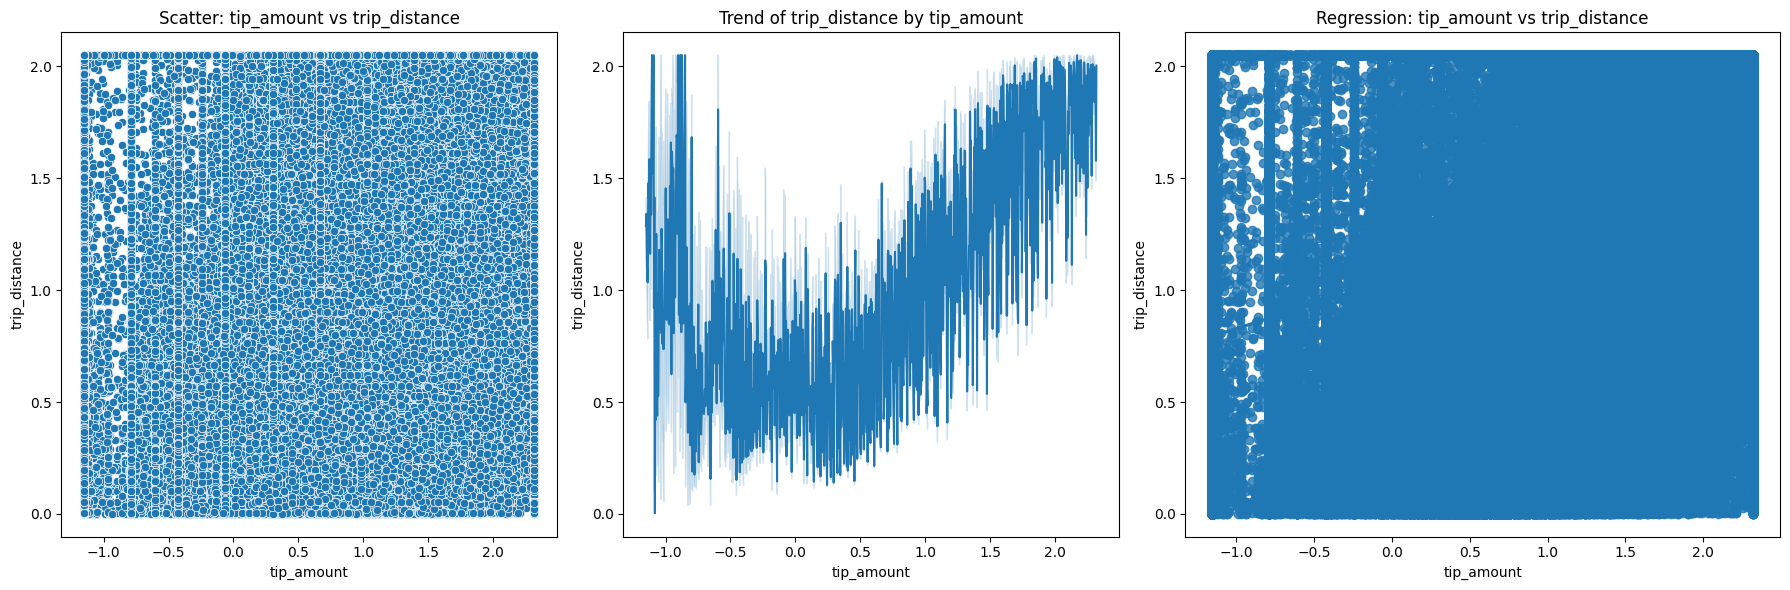

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_relationships(df, column_pairs, draw_plot='Y'):
    """
    Plots Scatter Plot, Line Plot, and Regression Plot for given column pairs.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    column_pairs (list of tuples): List of (x_col, y_col) column pairs to analyze.
    draw_plot (str): 'Y' to plot graphs, 'N' to skip plotting.
    """
    
    for x_col, y_col in column_pairs:
        print(f"\nAnalyzing relationship between '{x_col}' and '{y_col}'")

        # Calculate correlation
        correlation = df[x_col].corr(df[y_col])
        print(f"Correlation between {x_col} and {y_col}: {correlation:.2f}")
        
        if draw_plot == 'Y':
            fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1, 1.2]})
            
            # Scatter Plot
            sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[0])
            axes[0].set_title(f'Scatter: {x_col} vs {y_col}')
            
            # Line Plot
            sns.lineplot(data=df, x=x_col, y=y_col, ax=axes[1])
            axes[1].set_title(f'Trend of {y_col} by {x_col}')
            
            # Regression Plot
            sns.regplot(data=df, x=x_col, y=y_col, ax=axes[2])
            axes[2].set_title(f'Regression: {x_col} vs {y_col}')
            
            plt.tight_layout()
            plt.show()

# Define column pairs for bivariate analysis
column_pairs = [("trip_duration", "fare_amount"), 
                ("fare_amount", "passenger_count"), 
                ("tip_amount", "trip_distance")]

# Run function with plotting
plot_relationships(df_filtered, column_pairs, draw_plot='Y')


#### 1. `fare_amount` and `trip_duration` Box Plot : Shows fare distribution by distance bins

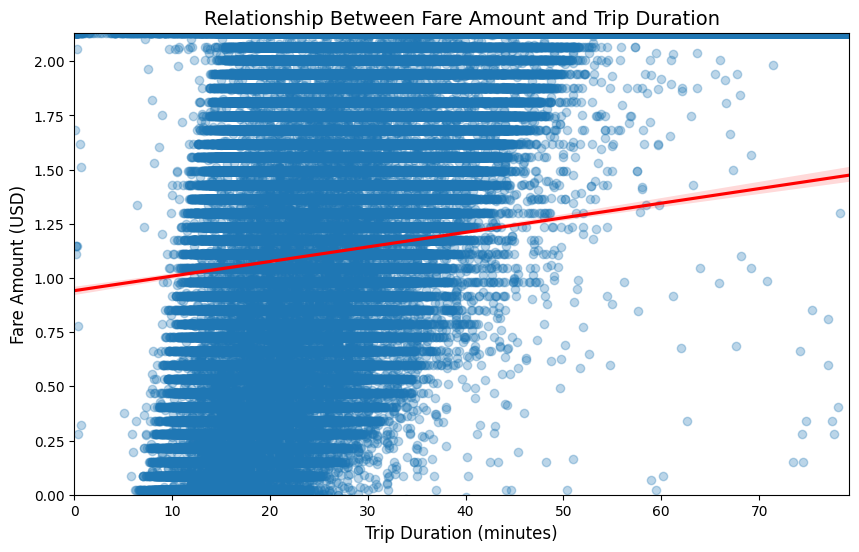

In [106]:
# Show relationship between fare and trip duration

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime columns are in datetime format
df_clean["tpep_pickup_datetime"] = pd.to_datetime(df_clean["tpep_pickup_datetime"])
df_clean["tpep_dropoff_datetime"] = pd.to_datetime(df_clean["tpep_dropoff_datetime"])

# Calculate trip duration in minutes
df_clean["trip_duration"] = (df_clean["tpep_dropoff_datetime"] - df_clean["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Remove negative or zero-duration trips
df_clean = df_clean[df_clean["trip_duration"] > 0]

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x="trip_duration", y="fare_amount", scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

# Titles and labels
plt.title("Relationship Between Fare Amount and Trip Duration", fontsize=14)
plt.xlabel("Trip Duration (minutes)", fontsize=12)
plt.ylabel("Fare Amount (USD)", fontsize=12)
plt.ylim(0, df_clean["fare_amount"].quantile(0.99))  # Remove extreme outliers
plt.xlim(0, df_clean["trip_duration"].quantile(0.99))

plt.show()

#### 2. `fare_amount` and `passenger_count`

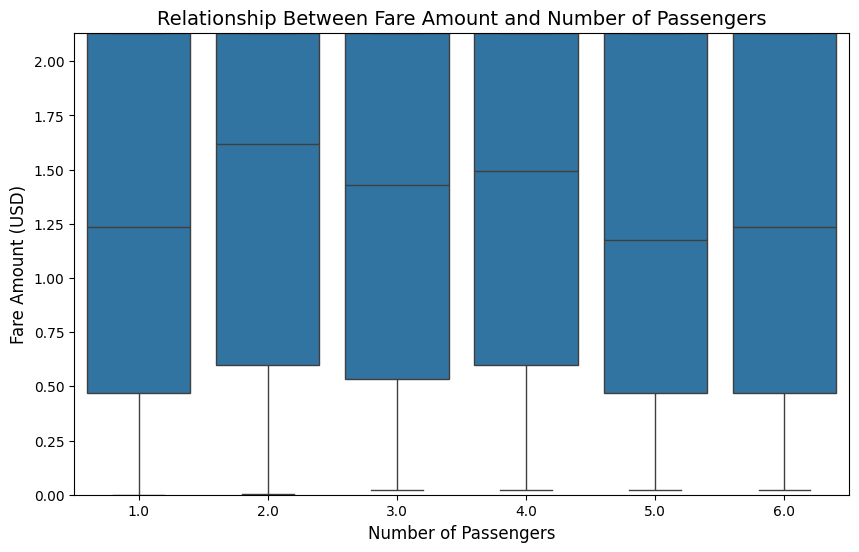

In [107]:
# Show relationship between fare and number of passengers

import seaborn as sns
import matplotlib.pyplot as plt

# Remove zero or negative fare values
df_clean = df_clean[df_clean["fare_amount"] > 0]

# Box plot to show distribution of fares per passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x="passenger_count", y="fare_amount")

# Titles and labels
plt.title("Relationship Between Fare Amount and Number of Passengers", fontsize=14)
plt.xlabel("Number of Passengers", fontsize=12)
plt.ylabel("Fare Amount (USD)", fontsize=12)
plt.ylim(0, df_clean["fare_amount"].quantile(0.99))  # Removing extreme outliers

plt.show()


# Bivariate Analysis

In [108]:
def plot_relationship(df, x_col, y_col):
    plt.figure(figsize=(15, 5))
    
    # Scatter Plot
    plt.subplot(1, 3, 1)
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'{x_col} vs {y_col}')
    
    # Line Plot
    plt.subplot(1, 3, 2)
    sns.lineplot(data=df, x=x_col, y=y_col)
    plt.title(f'Trend of {y_col} by {x_col}')
    
    # Regression Plot
    plt.subplot(1, 3, 3)
    sns.regplot(data=df, x=x_col, y=y_col)
    plt.title(f'Regression Plot: {x_col} vs {y_col}')
    
    plt.tight_layout()
    plt.show()

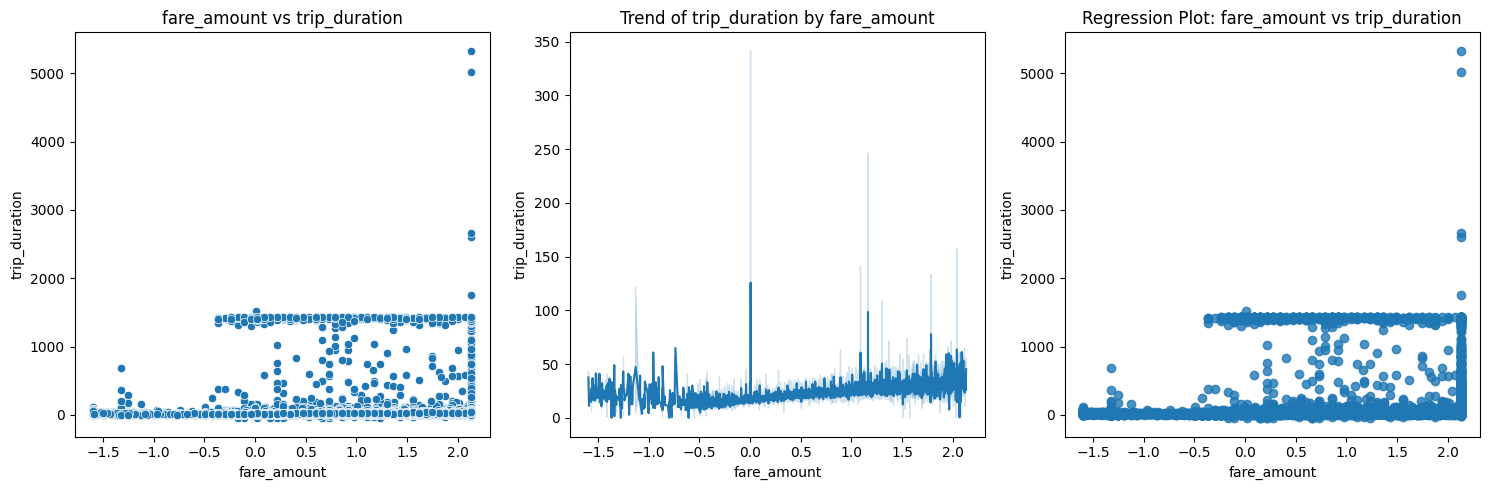

In [109]:
df_filtered["trip_duration"] = (df_filtered["tpep_dropoff_datetime"] - df_filtered["tpep_pickup_datetime"]).dt.total_seconds() / 60 
plot_relationship(df_filtered, "fare_amount","trip_duration")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

#### Count and Percentage of Each Payment Type

In [110]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df_filtered["payment_type"].value_counts()
payment_percentages = df_filtered["payment_type"].value_counts(normalize=True) * 100

print("Payment Type Distribution:")
print(pd.DataFrame({"Count": payment_counts, "Percentage": payment_percentages.round(2)}))


Payment Type Distribution:
               Count  Percentage
payment_type                    
1             499185       77.66
2             143580       22.34


#### Bar Plot of Payment Type Distribution

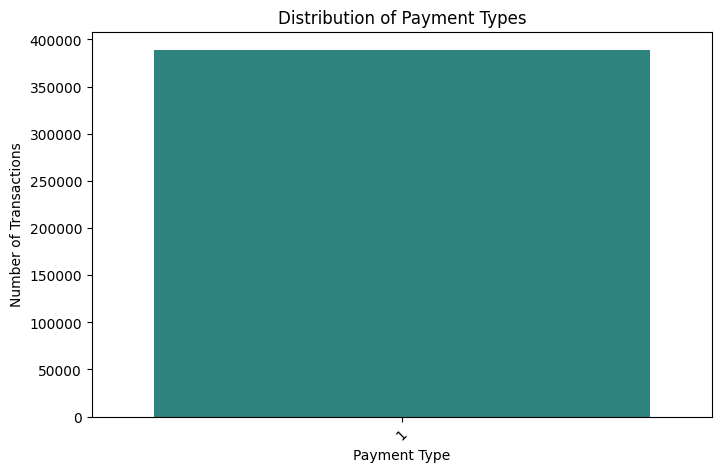

In [111]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x="payment_type", palette="viridis")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [112]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [113]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones.shp") # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

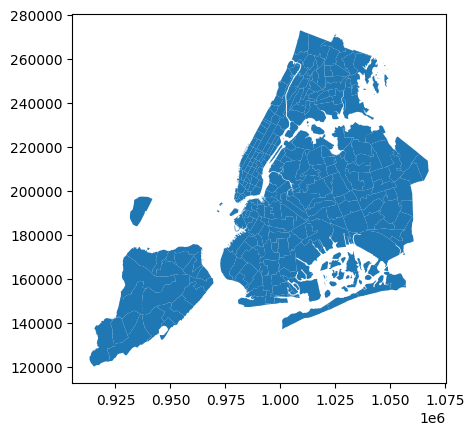

In [114]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [115]:
# Merge zones and trip records using locationID and PULocationID

# Merge df_clean with zones to get pickup zone
df_merged = df_clean.merge(zones, left_on="pulocationid", right_on="LocationID", how="left")
df_merged.rename(columns={"zone": "pickup_zone"}, inplace=True)
df_merged.drop(columns=["LocationID"], inplace=True)  # Drop redundant column

# Merge again to get dropoff zone
df_merged = df_merged.merge(zones, left_on="dolocationid", right_on="LocationID", how="left")
df_merged.rename(columns={"zone": "dropoff_zone"}, inplace=True)
df_merged.drop(columns=["LocationID"], inplace=True)  # Drop redundant column

# Display the new DataFrame
df_merged.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,Shape_Area_x,pickup_zone,borough_x,geometry_x,OBJECTID_y,Shape_Leng_y,Shape_Area_y,dropoff_zone,borough_y,geometry_y
0,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1.0,2.049013,1.0,N,66,107,1,...,0.000108,DUMBO/Vinegar Hill,Brooklyn,"POLYGON ((990055.507 196472.349, 990004.46 196...",107.0,0.038041,0.000075,Gramercy,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20..."
1,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,2.049013,1.0,N,246,37,1,...,0.000281,West Chelsea/Hudson Yards,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216...",37.0,0.142810,0.000452,Bushwick South,Brooklyn,"POLYGON ((1002791.711 196025.081, 1002823.637 ..."
2,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1.0,0.270596,1.0,N,79,256,1,...,0.000108,East Village,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...",256.0,0.067915,0.000169,Williamsburg (South Side),Brooklyn,"POLYGON ((995798.638 199155.97, 996223.601 198..."
3,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1.0,2.049013,1.0,N,132,95,1,...,0.002038,JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",95.0,0.113630,0.000573,Forest Hills,Queens,"POLYGON ((1026559.225 208467.841, 1026590.157 ..."
4,2,2023-01-01 00:24:48,2023-01-01 00:45:04,1.0,0.091101,1.0,N,79,186,1,...,0.000108,East Village,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...",186.0,0.024696,0.000037,Penn Station/Madison Sq West,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [116]:
# Group data by location and calculate the number of trips
# Group by pickup location and count trips
pickup_trips = df_clean.groupby("pulocationid").size().reset_index(name="num_pickup_trips")

# Group by dropoff location and count trips
dropoff_trips = df_clean.groupby("dolocationid").size().reset_index(name="num_dropoff_trips")

# Merge both to get a complete view of trips per location
location_trips = pickup_trips.merge(dropoff_trips, left_on="pulocationid", right_on="dolocationid", how="outer")

# Fill NaN values with 0 (for locations that are only pickups or only dropoffs)
location_trips.fillna(0, inplace=True)

# Add total trips column (sum of pickups and dropoffs)
location_trips["total_trips"] = location_trips["num_pickup_trips"] + location_trips["num_dropoff_trips"]

# Drop duplicate location columns
location_trips.drop(columns=["dolocationid"], inplace=True)

# Rename pulocationid to LocationID for clarity
location_trips.rename(columns={"pulocationid": "LocationID"}, inplace=True)

# Merge with zones to get zone names
location_trips = location_trips.merge(zones, on="LocationID", how="left")

# Display results
location_trips.head()


,LocationID,num_pickup_trips,num_dropoff_trips,total_trips,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,1.0,12.0,4140.0,4152.0,1.0,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2.0,2.0,0.0,2.0,2.0,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,0.0,0.0,52.0,52.0,NaN,NaN,NaN,NaN,NaN,None
3,4.0,496.0,1477.0,1973.0,4.0,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,0.0,0.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,None


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [117]:
# Merge trip counts back to the zones GeoDataFrame

import geopandas as gpd

# Ensure `zones` has a geometry column
gdf = gpd.GeoDataFrame(zones, geometry=zones["geometry"])

# Ensure CRS is set if it's missing
if gdf.crs is None:
    gdf = gdf.set_crs("EPSG:4326")  # Assuming WGS84 (adjust if needed)

# Merge grouped trip data with GeoDataFrame using 'LocationID'
gdf = gdf.merge(location_trips, on="LocationID", how="left")

# Fill missing values with 0 (some locations might not have trips)
gdf[["num_pickup_trips", "num_dropoff_trips", "total_trips"]] = gdf[
    ["num_pickup_trips", "num_dropoff_trips", "total_trips"]
].fillna(0)

# Check the updated GeoDataFrame
gdf.head()


,OBJECTID_x,Shape_Leng_x,Shape_Area_x,zone_x,LocationID,borough_x,geometry_x,num_pickup_trips,num_dropoff_trips,total_trips,OBJECTID_y,Shape_Leng_y,Shape_Area_y,zone_y,borough_y,geometry_y
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",12.0,4140.0,4152.0,1.0,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,0.0,2.0,2.0,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,None
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",496.0,1477.0,1973.0,4.0,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,None


OBJECTID_x              int32
Shape_Leng_x          float64
Shape_Area_x          float64
zone_x                 object
LocationID              int32
borough_x              object
geometry_x           geometry
num_pickup_trips      float64
num_dropoff_trips     float64
total_trips           float64
OBJECTID_y            float64
Shape_Leng_y          float64
Shape_Area_y          float64
zone_y                 object
borough_y              object
geometry_y           geometry
dtype: object
Index(['OBJECTID_x', 'Shape_Leng_x', 'Shape_Area_x', 'zone_x', 'LocationID',
       'borough_x', 'geometry_x', 'num_pickup_trips', 'num_dropoff_trips',
       'total_trips', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y', 'zone_y',
       'borough_y', 'geometry_y'],
      dtype='object')


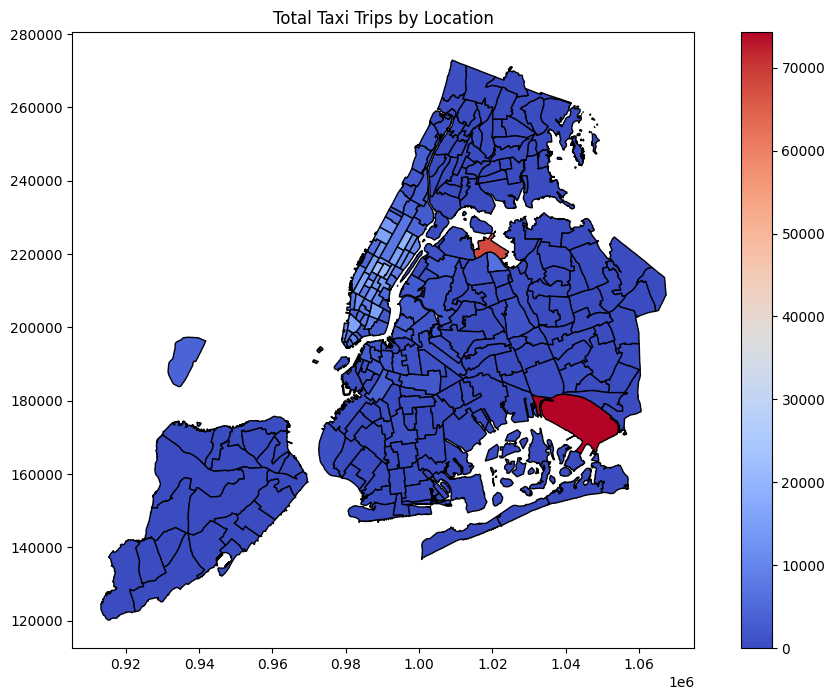

In [118]:
# Plot the total number of trips on the map
# Check available geometry columns
print(gdf.dtypes)
print(gdf.columns)

# If multiple geometry columns exist after merging, set the correct one
if "geometry_x" in gdf.columns:
    gdf = gdf.set_geometry("geometry_x")  # Change "geometry_x" to the correct column name

# Drop any extra geometry columns if needed
gdf = gdf.drop(columns=["geometry_y"], errors="ignore")  # Adjust if needed

# Ensure the CRS is set
if gdf.crs is None:
    gdf = gdf.set_crs("EPSG:4326")  # Assuming WGS84, adjust if necessary

# Now, plot the map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column="total_trips", cmap="coolwarm", legend=True, ax=ax, edgecolor="black")
plt.title("Total Taxi Trips by Location")
plt.show()


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

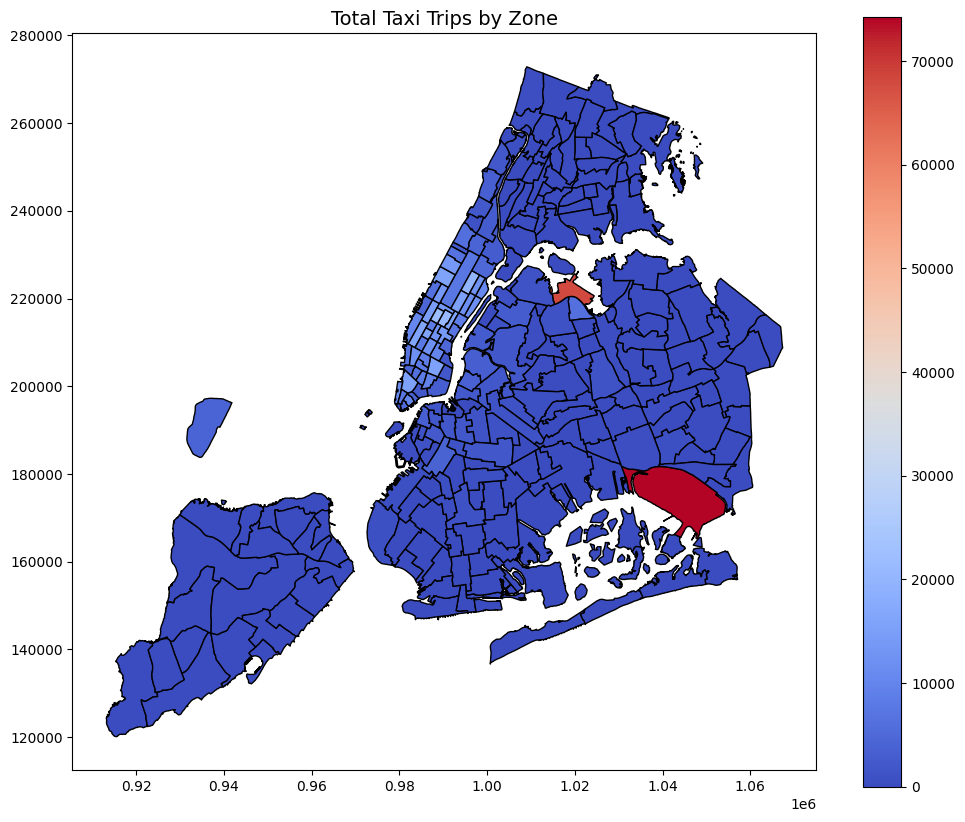

In [119]:
# Define figure and axis
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
# Ensure 'total_trips' is numeric and doesn't have missing values
gdf["total_trips"] = gdf["total_trips"].fillna(0)

# Plot using a color map ('coolwarm' or 'viridis' are good choices)
gdf.plot(column="total_trips", cmap="coolwarm", legend=True, ax=ax, edgecolor="black")

# Add a title
plt.title("Total Taxi Trips by Zone", fontsize=14)

# Show the plot
plt.show()


In [120]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by the number of trips in descending order
sorted_gdf = gdf.sort_values(by="total_trips", ascending=False)

# Display the top rows
sorted_gdf.head(10)  # Show top 10 zones with highest trips


,OBJECTID_x,Shape_Leng_x,Shape_Area_x,zone_x,LocationID,borough_x,geometry_x,num_pickup_trips,num_dropoff_trips,total_trips,OBJECTID_y,Shape_Leng_y,Shape_Area_y,zone_y,borough_y
133,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",60183.0,14110.0,74293.0,132.0,0.245479,0.002038,JFK Airport,Queens
139,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",48851.0,19290.0,68141.0,138.0,0.107467,0.000537,LaGuardia Airport,Queens
231,230,0.031028,0.000056,Times Sq/Theatre District,230,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21...",11737.0,10222.0,21959.0,230.0,0.031028,0.000056,Times Sq/Theatre District,Manhattan
162,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",12647.0,8251.0,20898.0,161.0,0.035804,0.000072,Midtown Center,Manhattan
237,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",9119.0,10633.0,19752.0,236.0,0.044252,0.000103,Upper East Side North,Manhattan
187,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21...",11282.0,4782.0,16064.0,186.0,0.024696,0.000037,Penn Station/Madison Sq West,Manhattan
69,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...",8986.0,7050.0,16036.0,68.0,0.049337,0.000111,East Chelsea,Manhattan
163,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",9497.0,6474.0,15971.0,162.0,0.035270,0.000048,Midtown East,Manhattan
240,239,0.063626,0.000205,Upper West Side South,239,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22...",6988.0,8889.0,15877.0,239.0,0.063626,0.000205,Upper West Side South,Manhattan
232,231,0.063420,0.000167,TriBeCa/Civic Center,231,Manhattan,"POLYGON ((981667.364 203305, 981854.109 203130...",6770.0,8857.0,15627.0,231.0,0.063420,0.000167,TriBeCa/Civic Center,Manhattan


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [121]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [122]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [123]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



SyntaxError: invalid syntax (2793492136.py, line 4)

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.